In [1]:
%load_ext autotimebar

Label(value='0s')

In [2]:
# Run this cell only to generate new results and then change the name of the file in the next cell
# Use the gen_some_results arguments to set the variable parameters (only one supported to visualize the results in this notebook)
# Number arguments (generate n evenly spaced parameter numbers): -agents n, -tasks n, -tasks_frequency n, -starts n, -goals n
# Number arguments (generate n evenly spaced parameter numbers): -agents_list <args>, -tasks_list <args>, -tasks_frequency_list <args>, -starts_list <args>, -goals_list <args>
# This cell will take some time to run (obviously)
import subprocess

subprocess.run(["python", "-m", 'gen_some_results', '-agents', '2'])
#subprocess.run(["python", "-m", 'gen_some_results', '-tasks', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-tasks_frequency', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-starts', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-goals', '5'])

Label(value='0s')

Namespace(agents=2, agents_list=None, starts=1, starts_list=None, goals=1, goals_list=None, tasks_frequency=1, tasks_frequency_list=None, tasks=1, tasks_list=None)
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 5 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 1 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  5.00%
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 5 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 1 
	Learning: True
Path collisions:  0
Switch collisions:  0
Progress:  10.00%
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 1 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  15.00%
Running Simulation...
DEA

CompletedProcess(args=['python', '-m', 'gen_some_results', '-agents', '2'], returncode=0)

Label(value='0s')

# results_30_06_2024__03_13_49.json
- ## Task number: [100]
- ## Task frequency: [1]
- ## Agent number: [5, 8]
- ## Pickup number: [24]
- ## Goal number: [14]


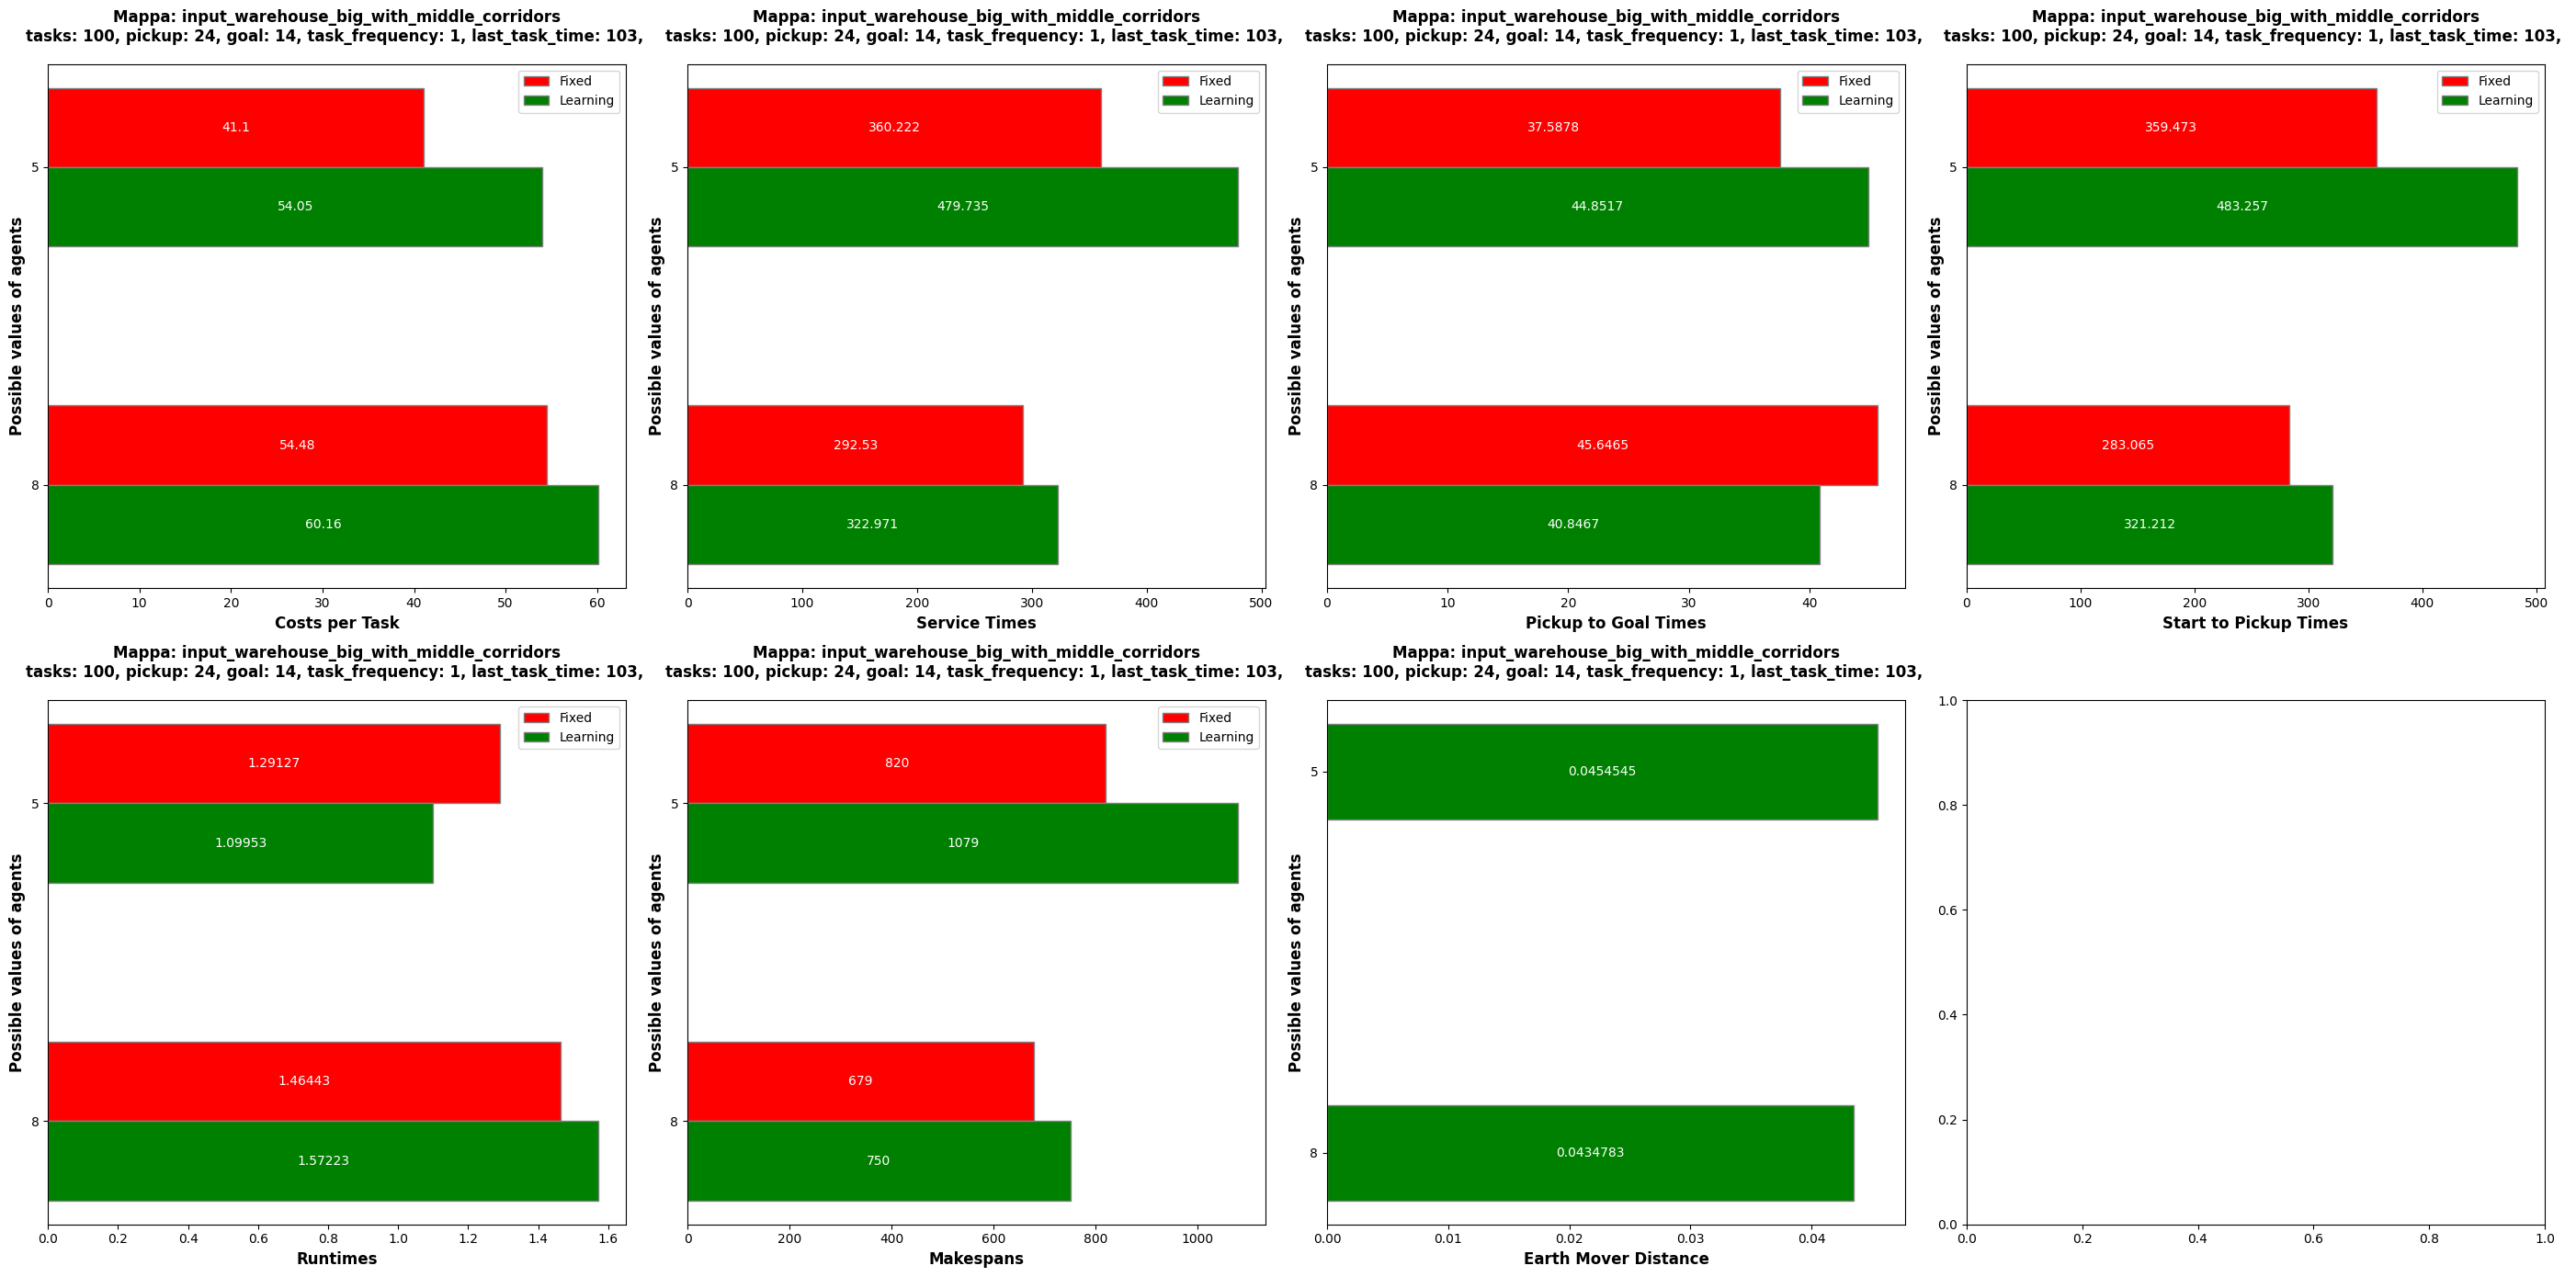

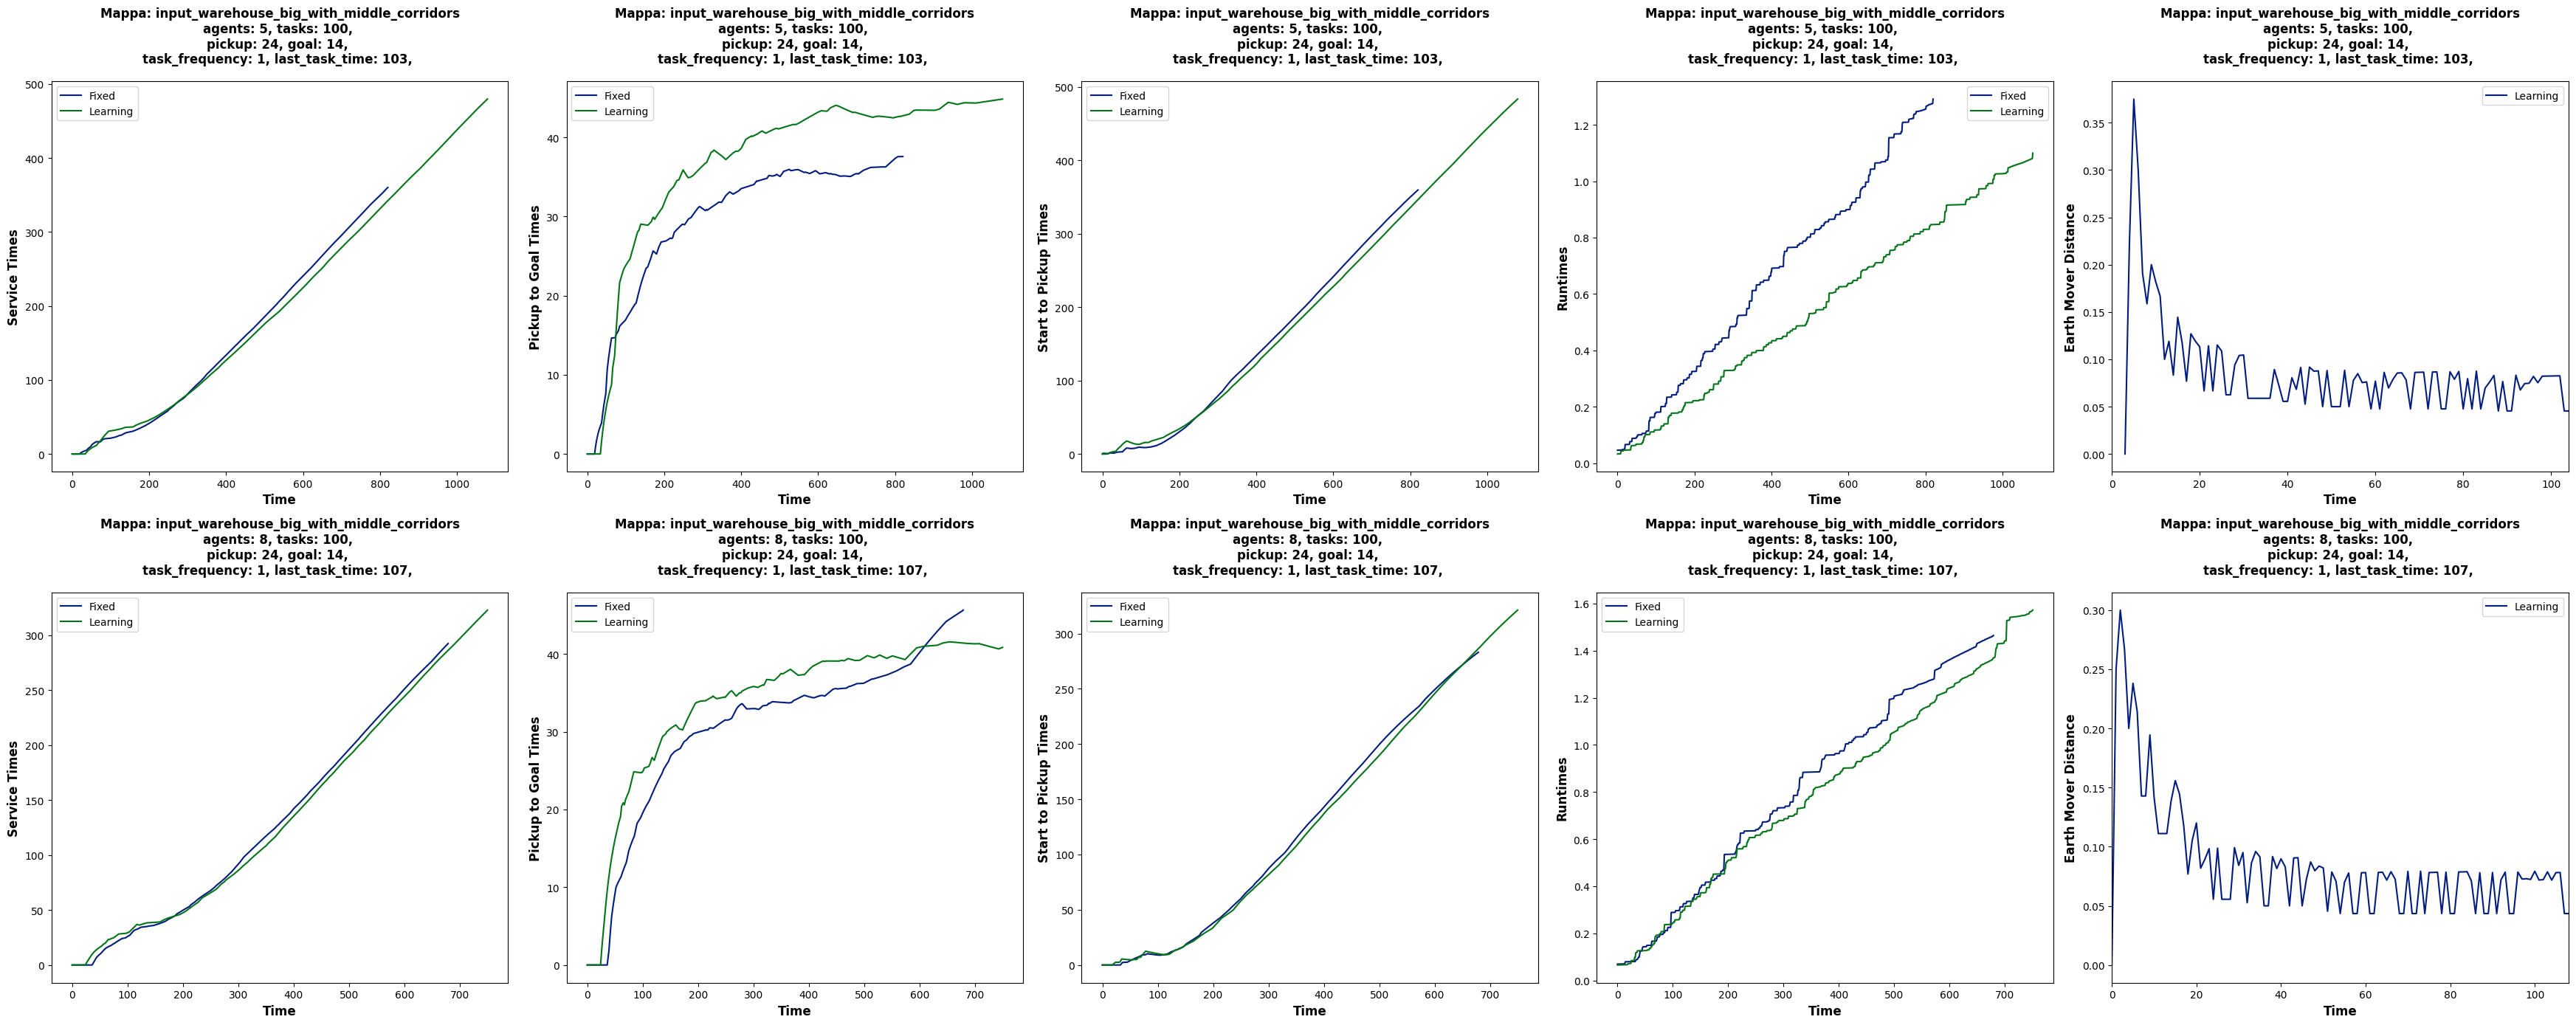

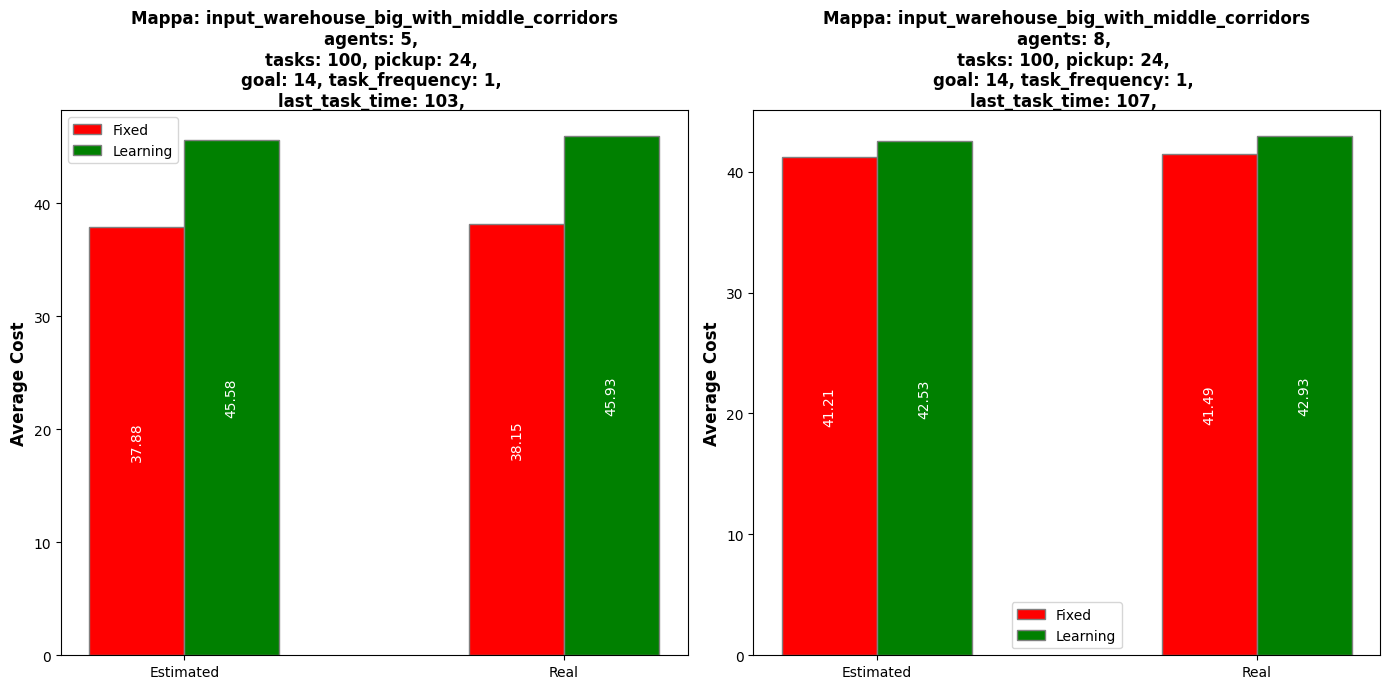

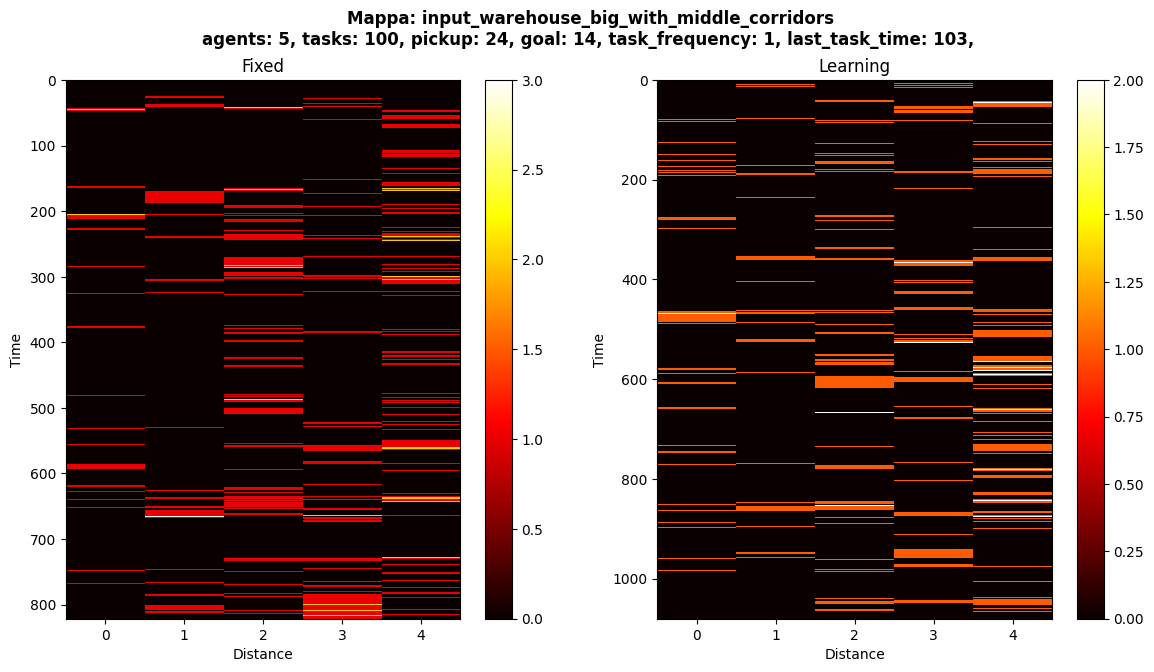

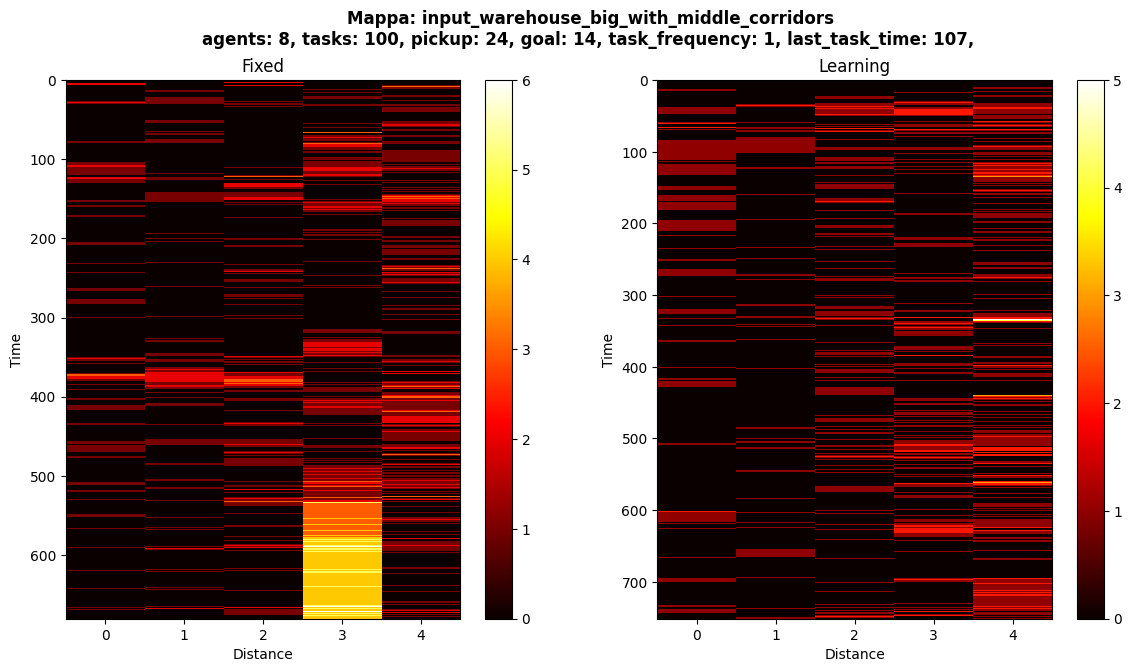

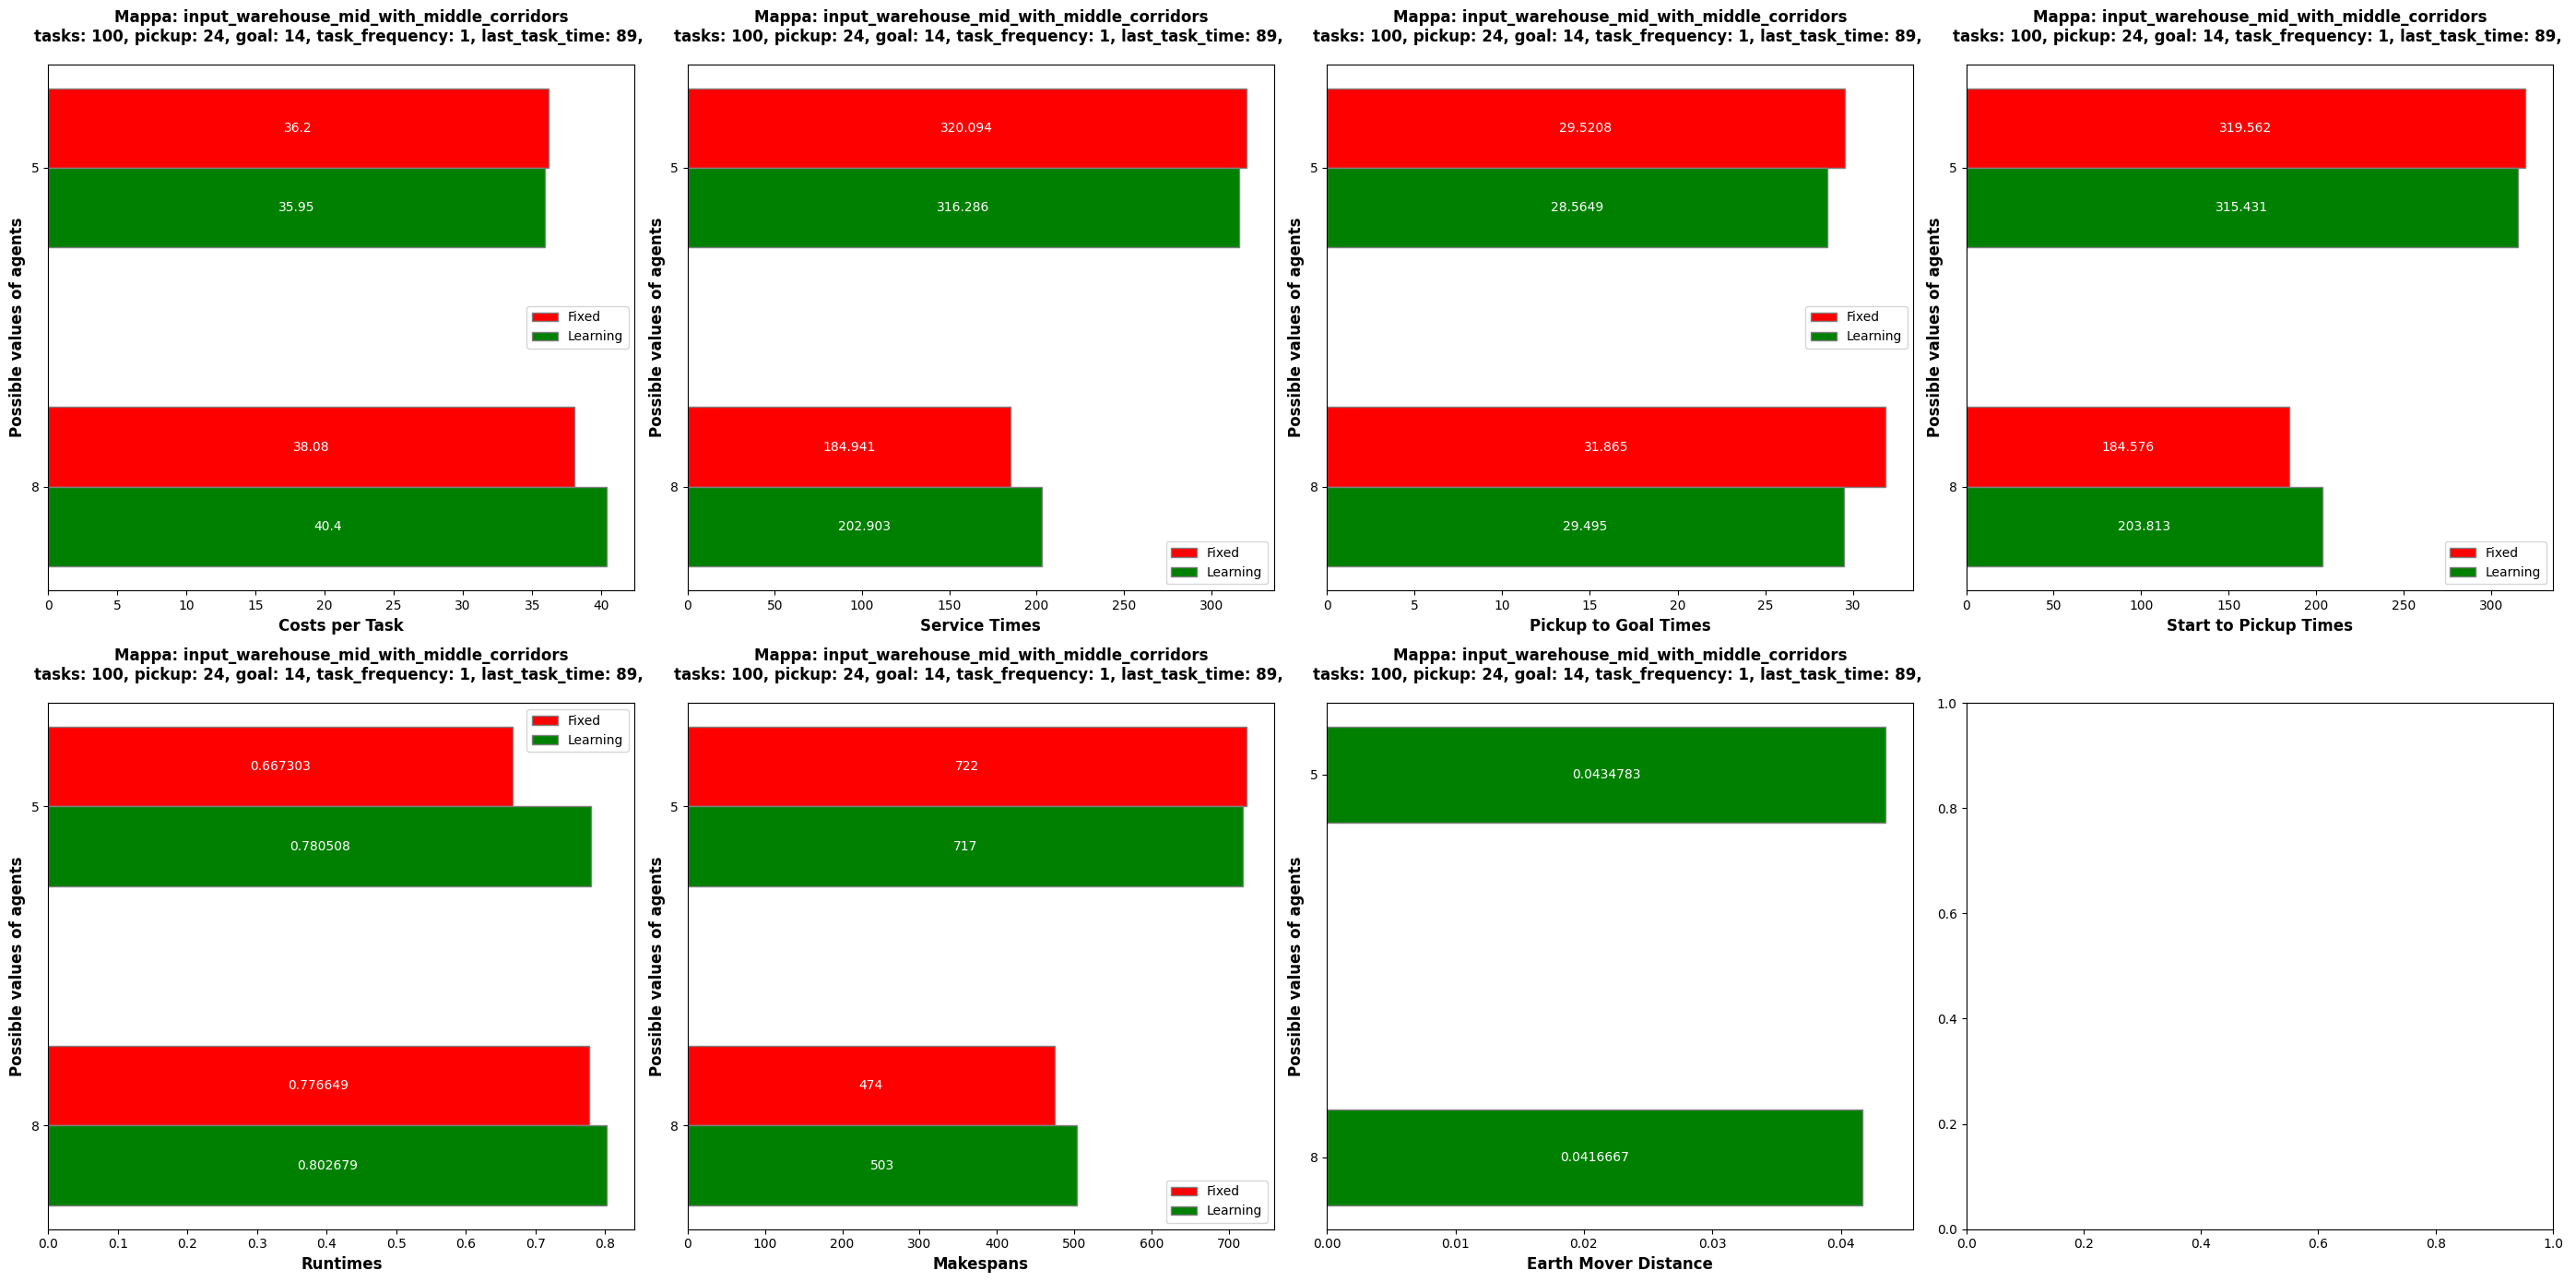

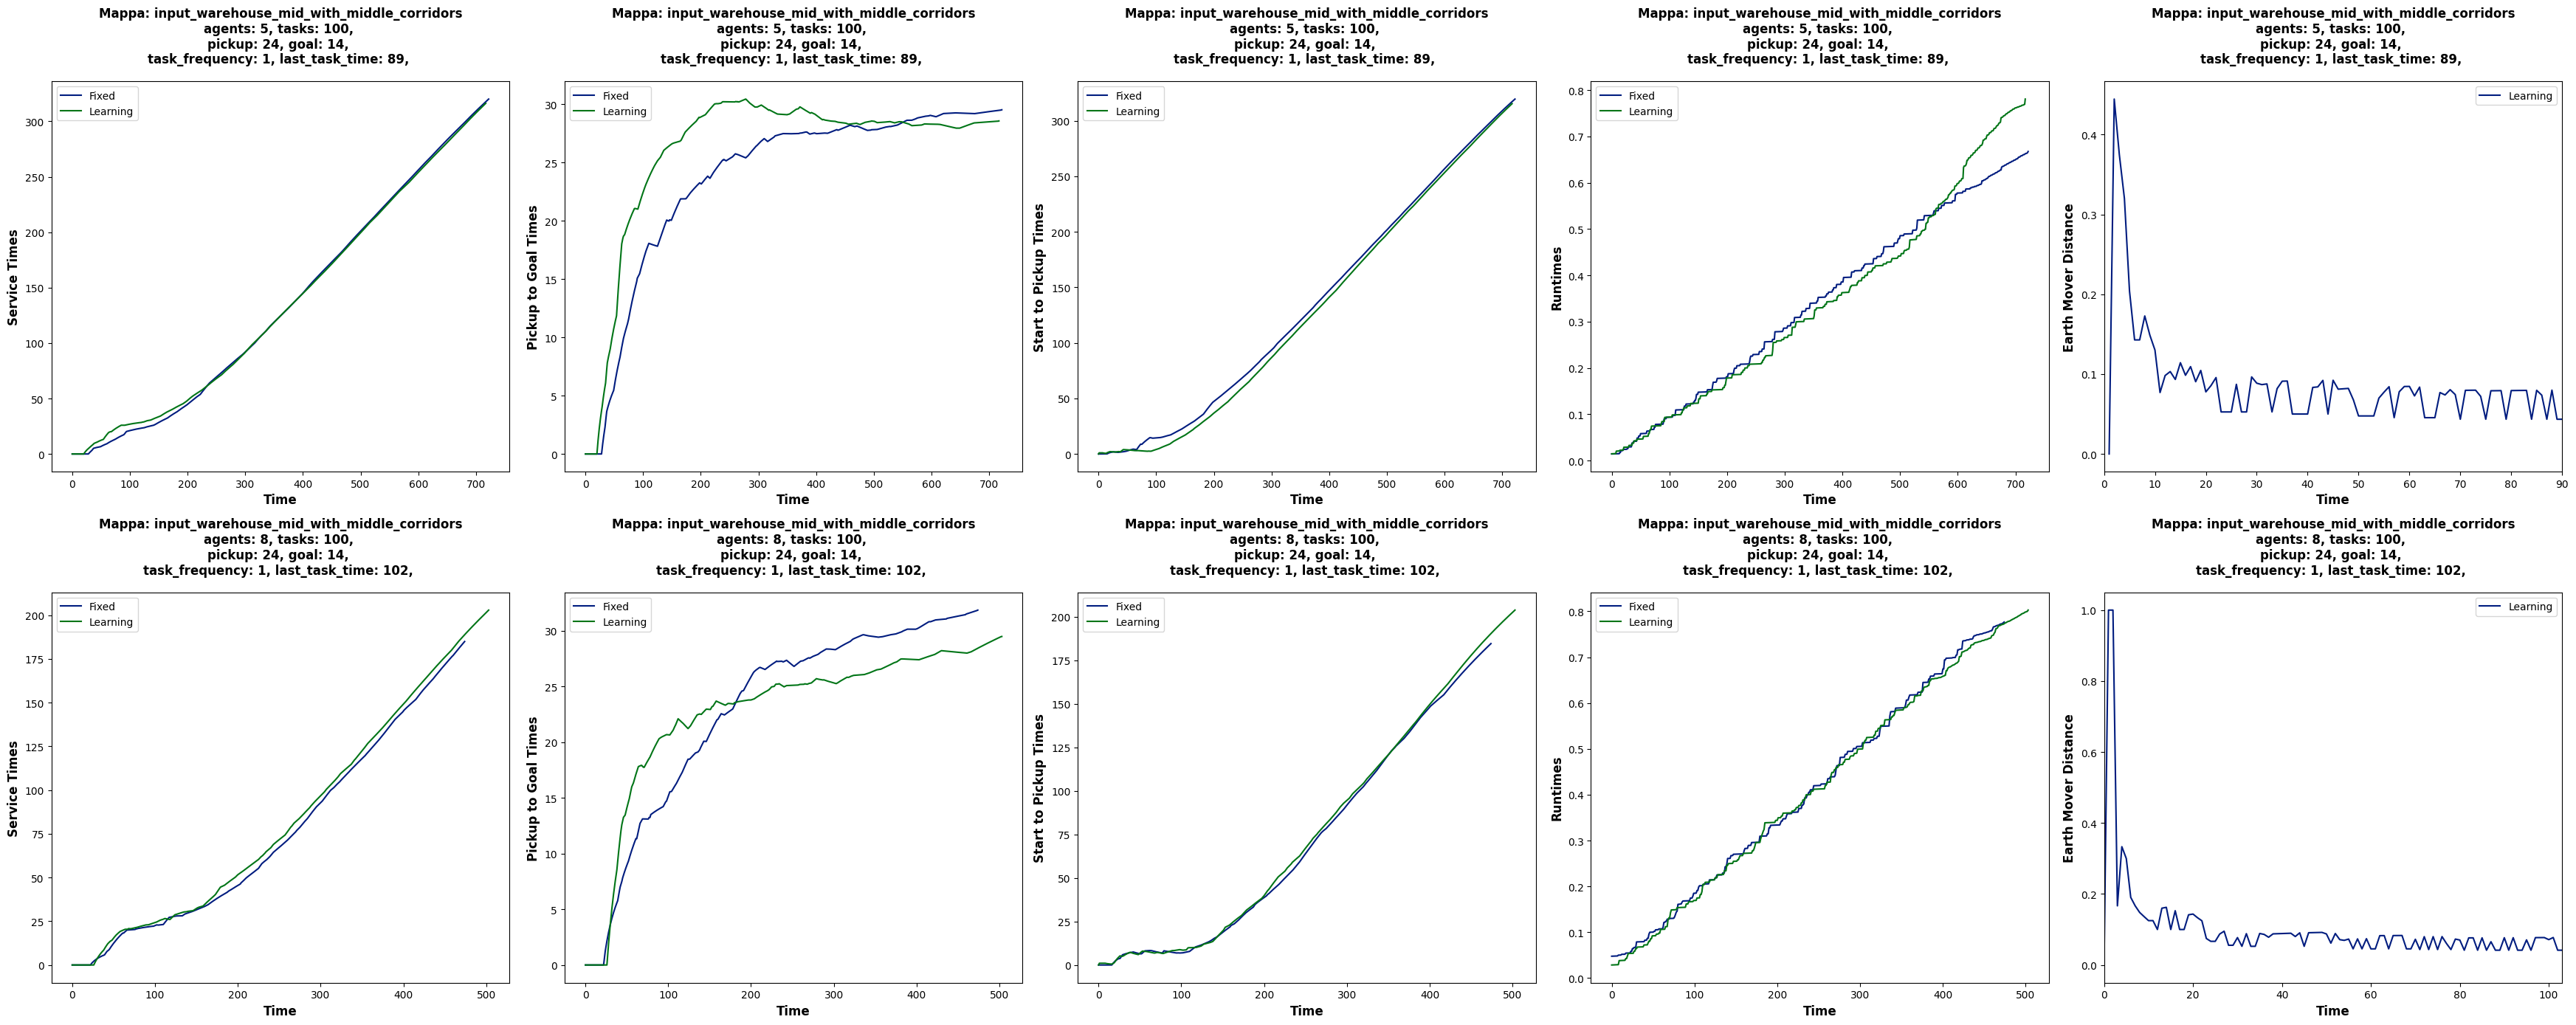

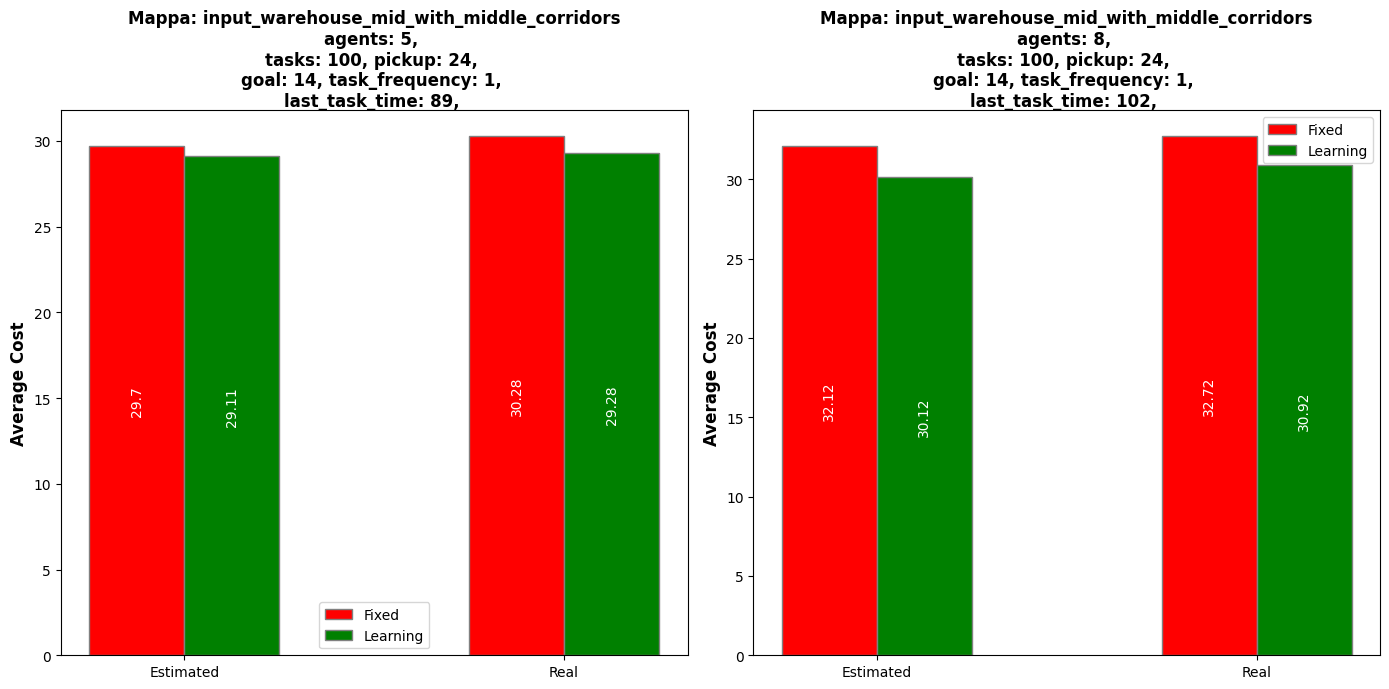

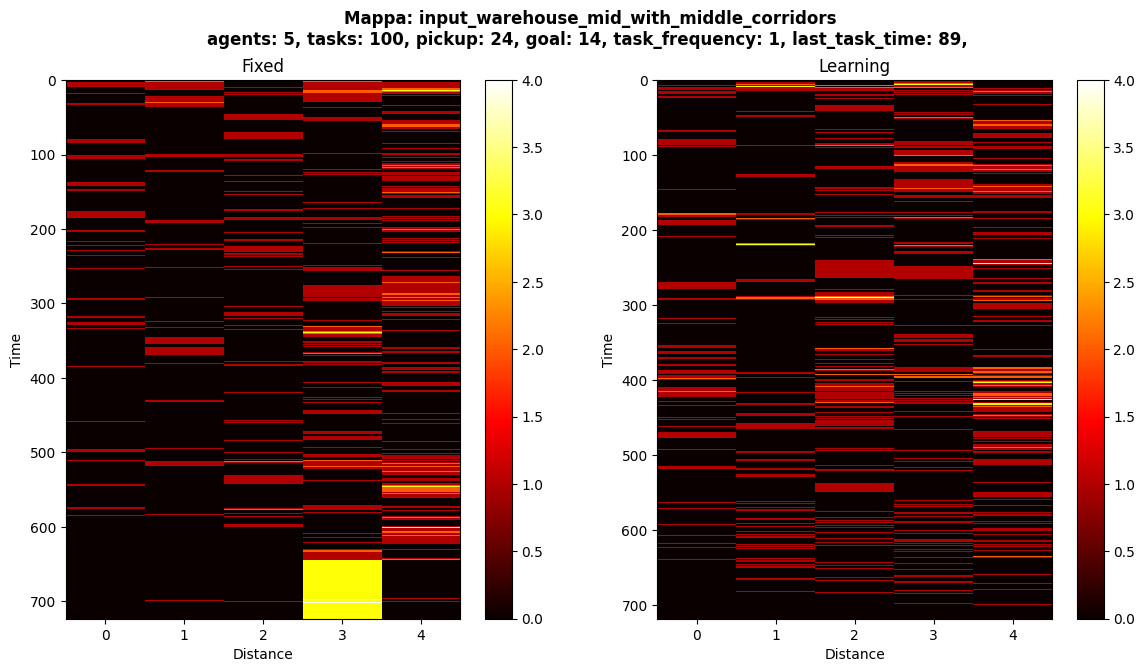

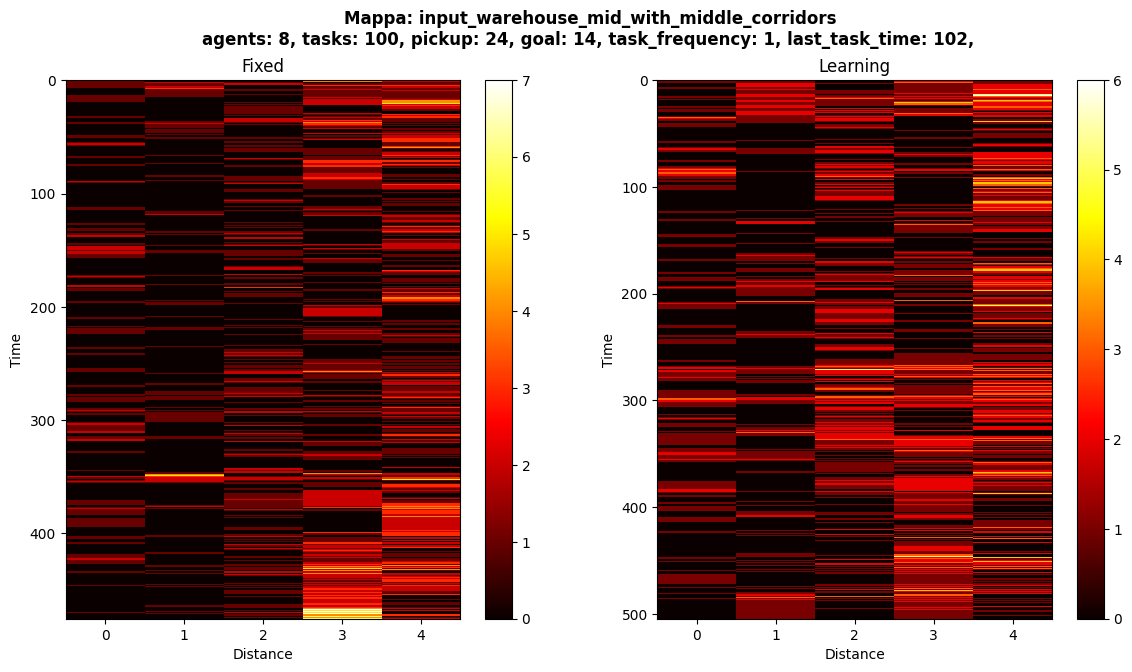

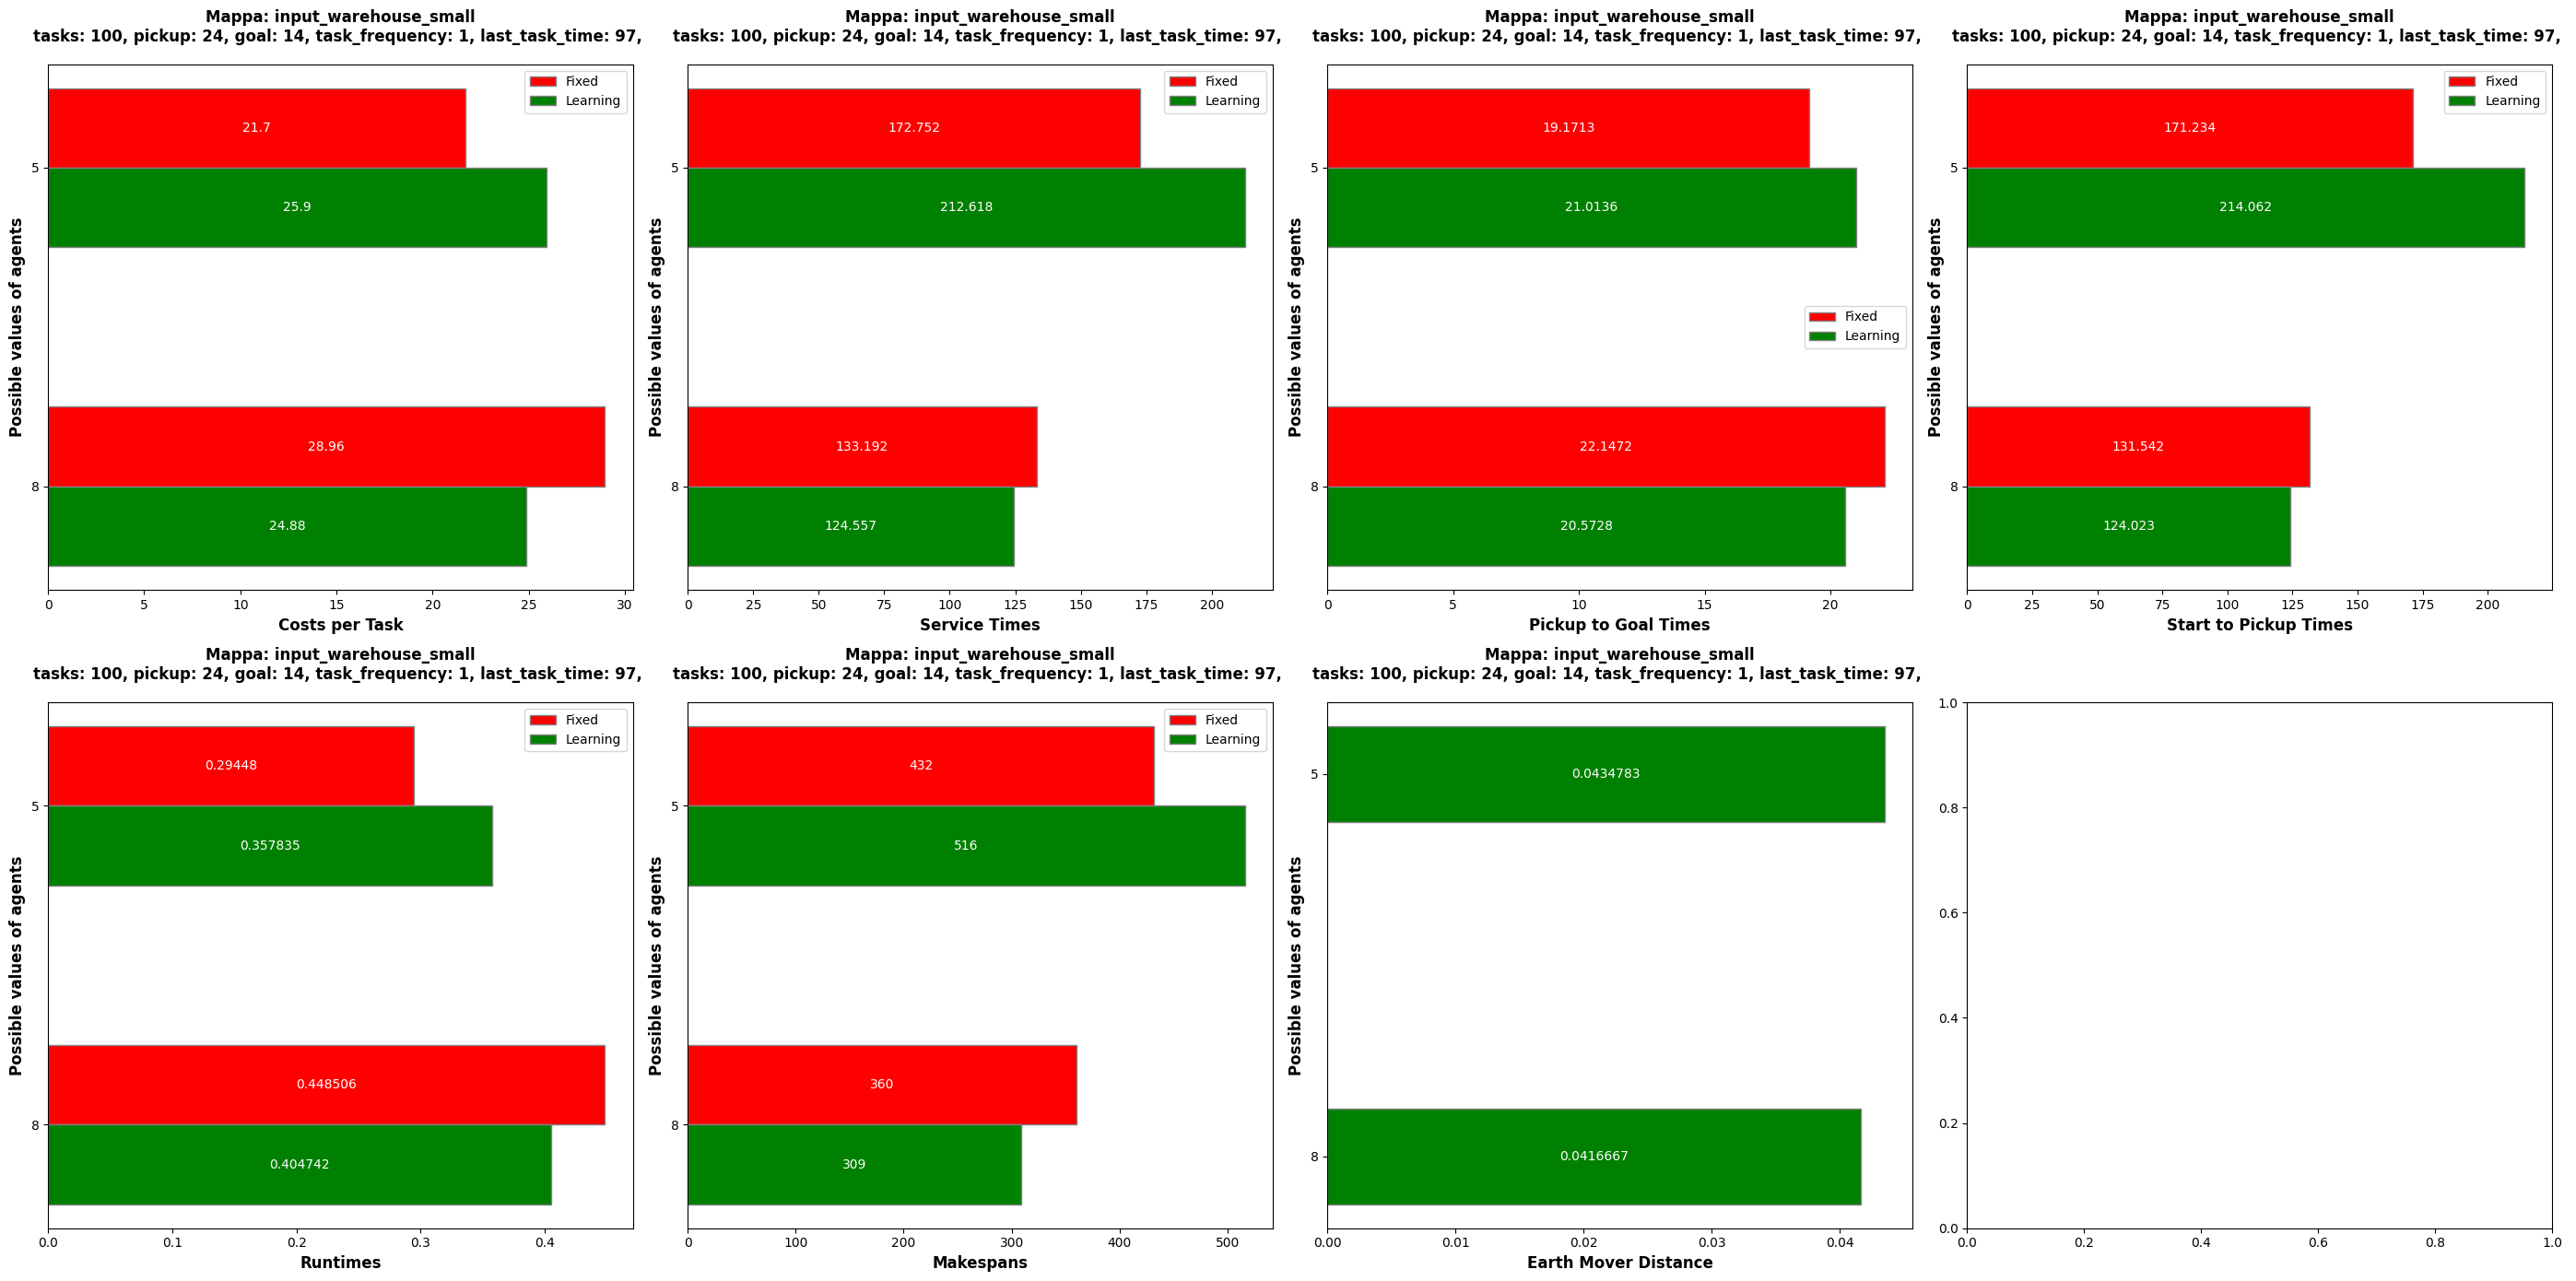

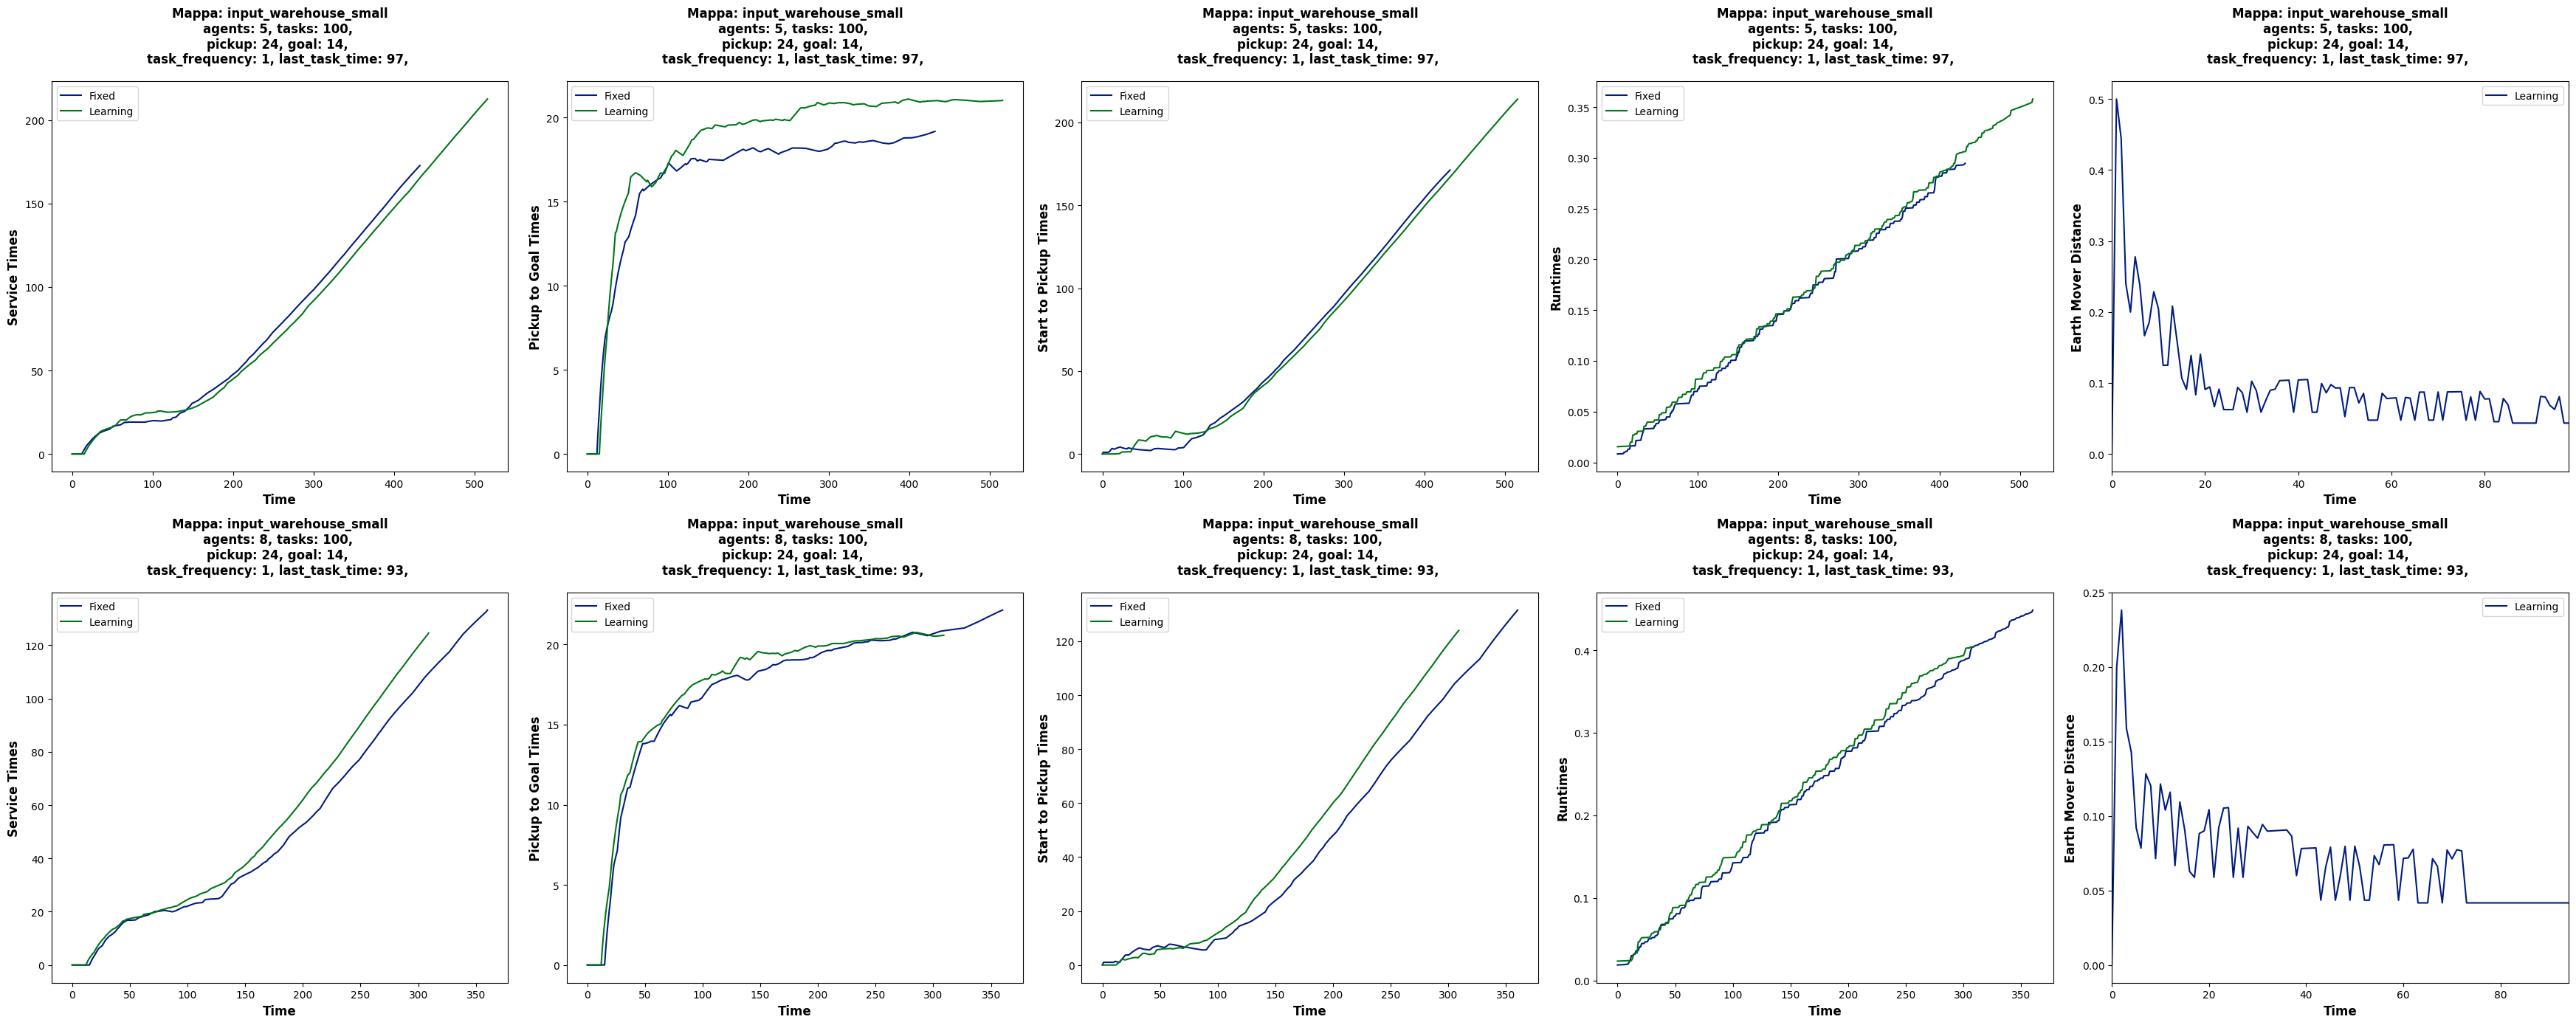

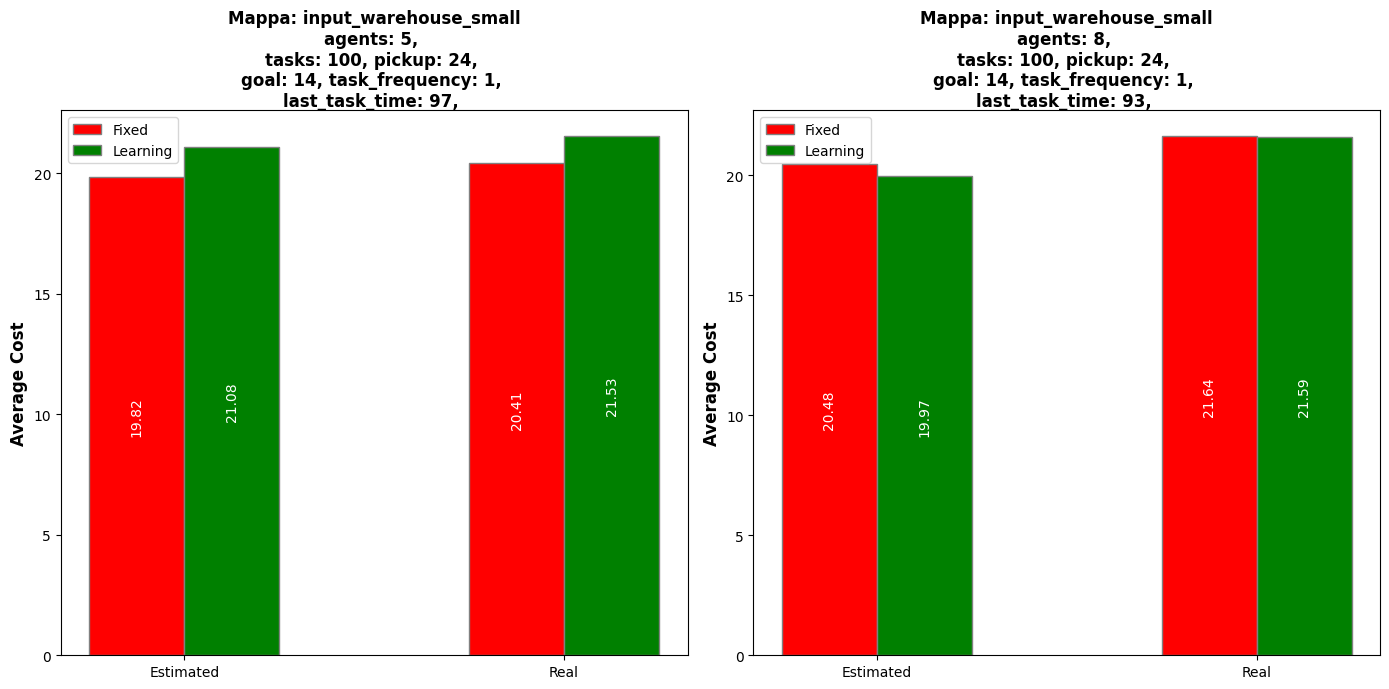

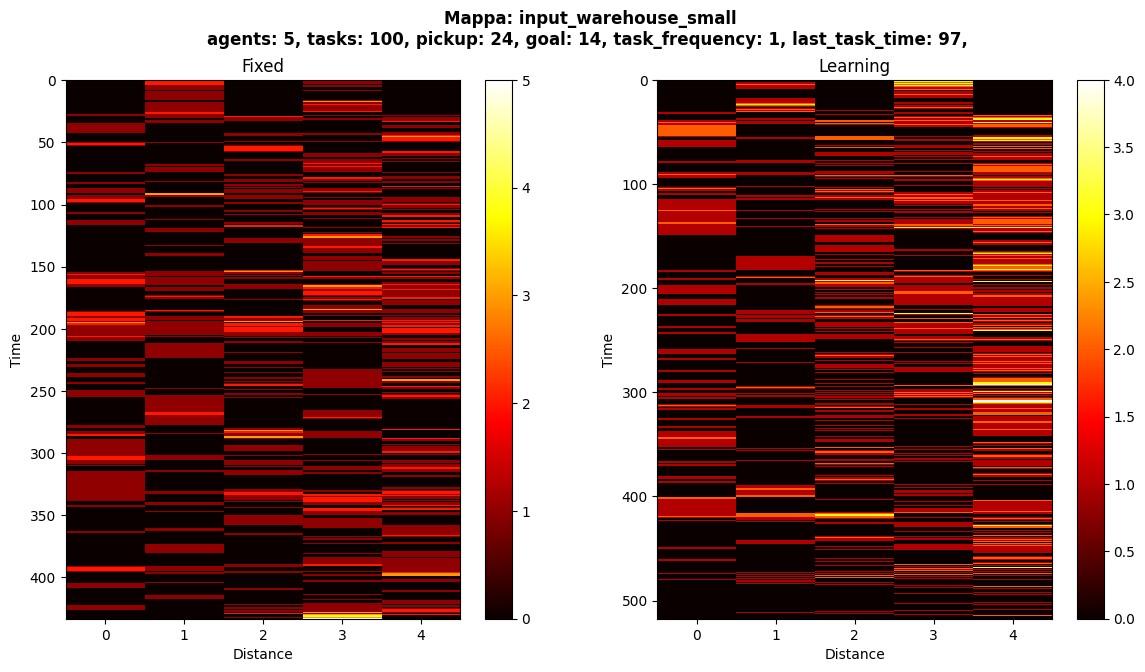

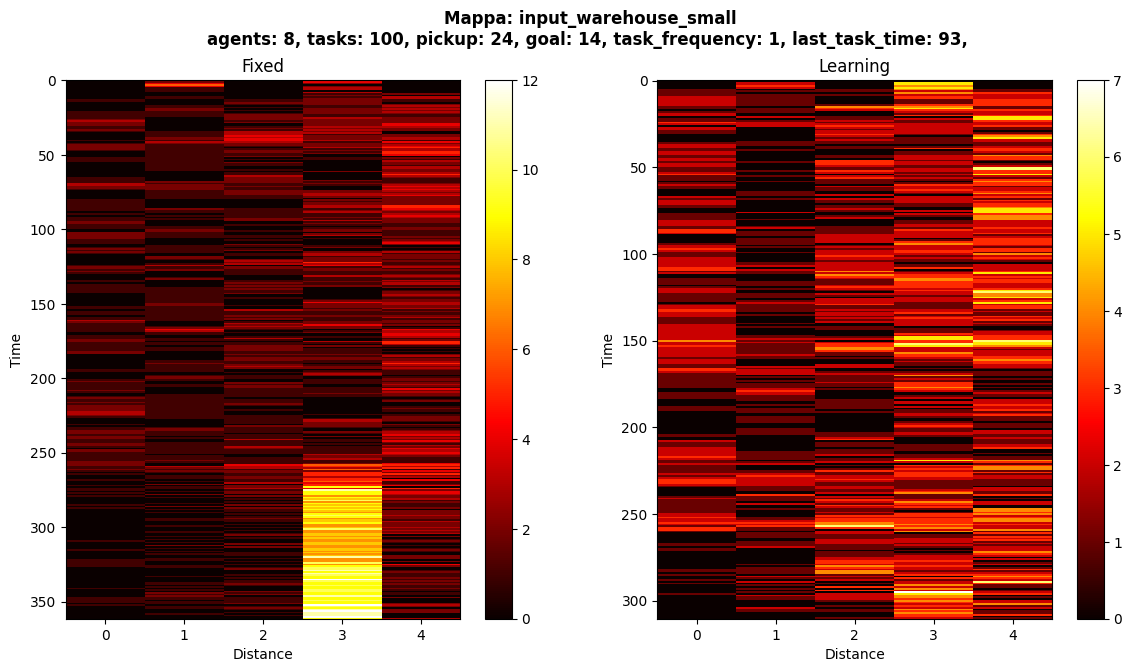

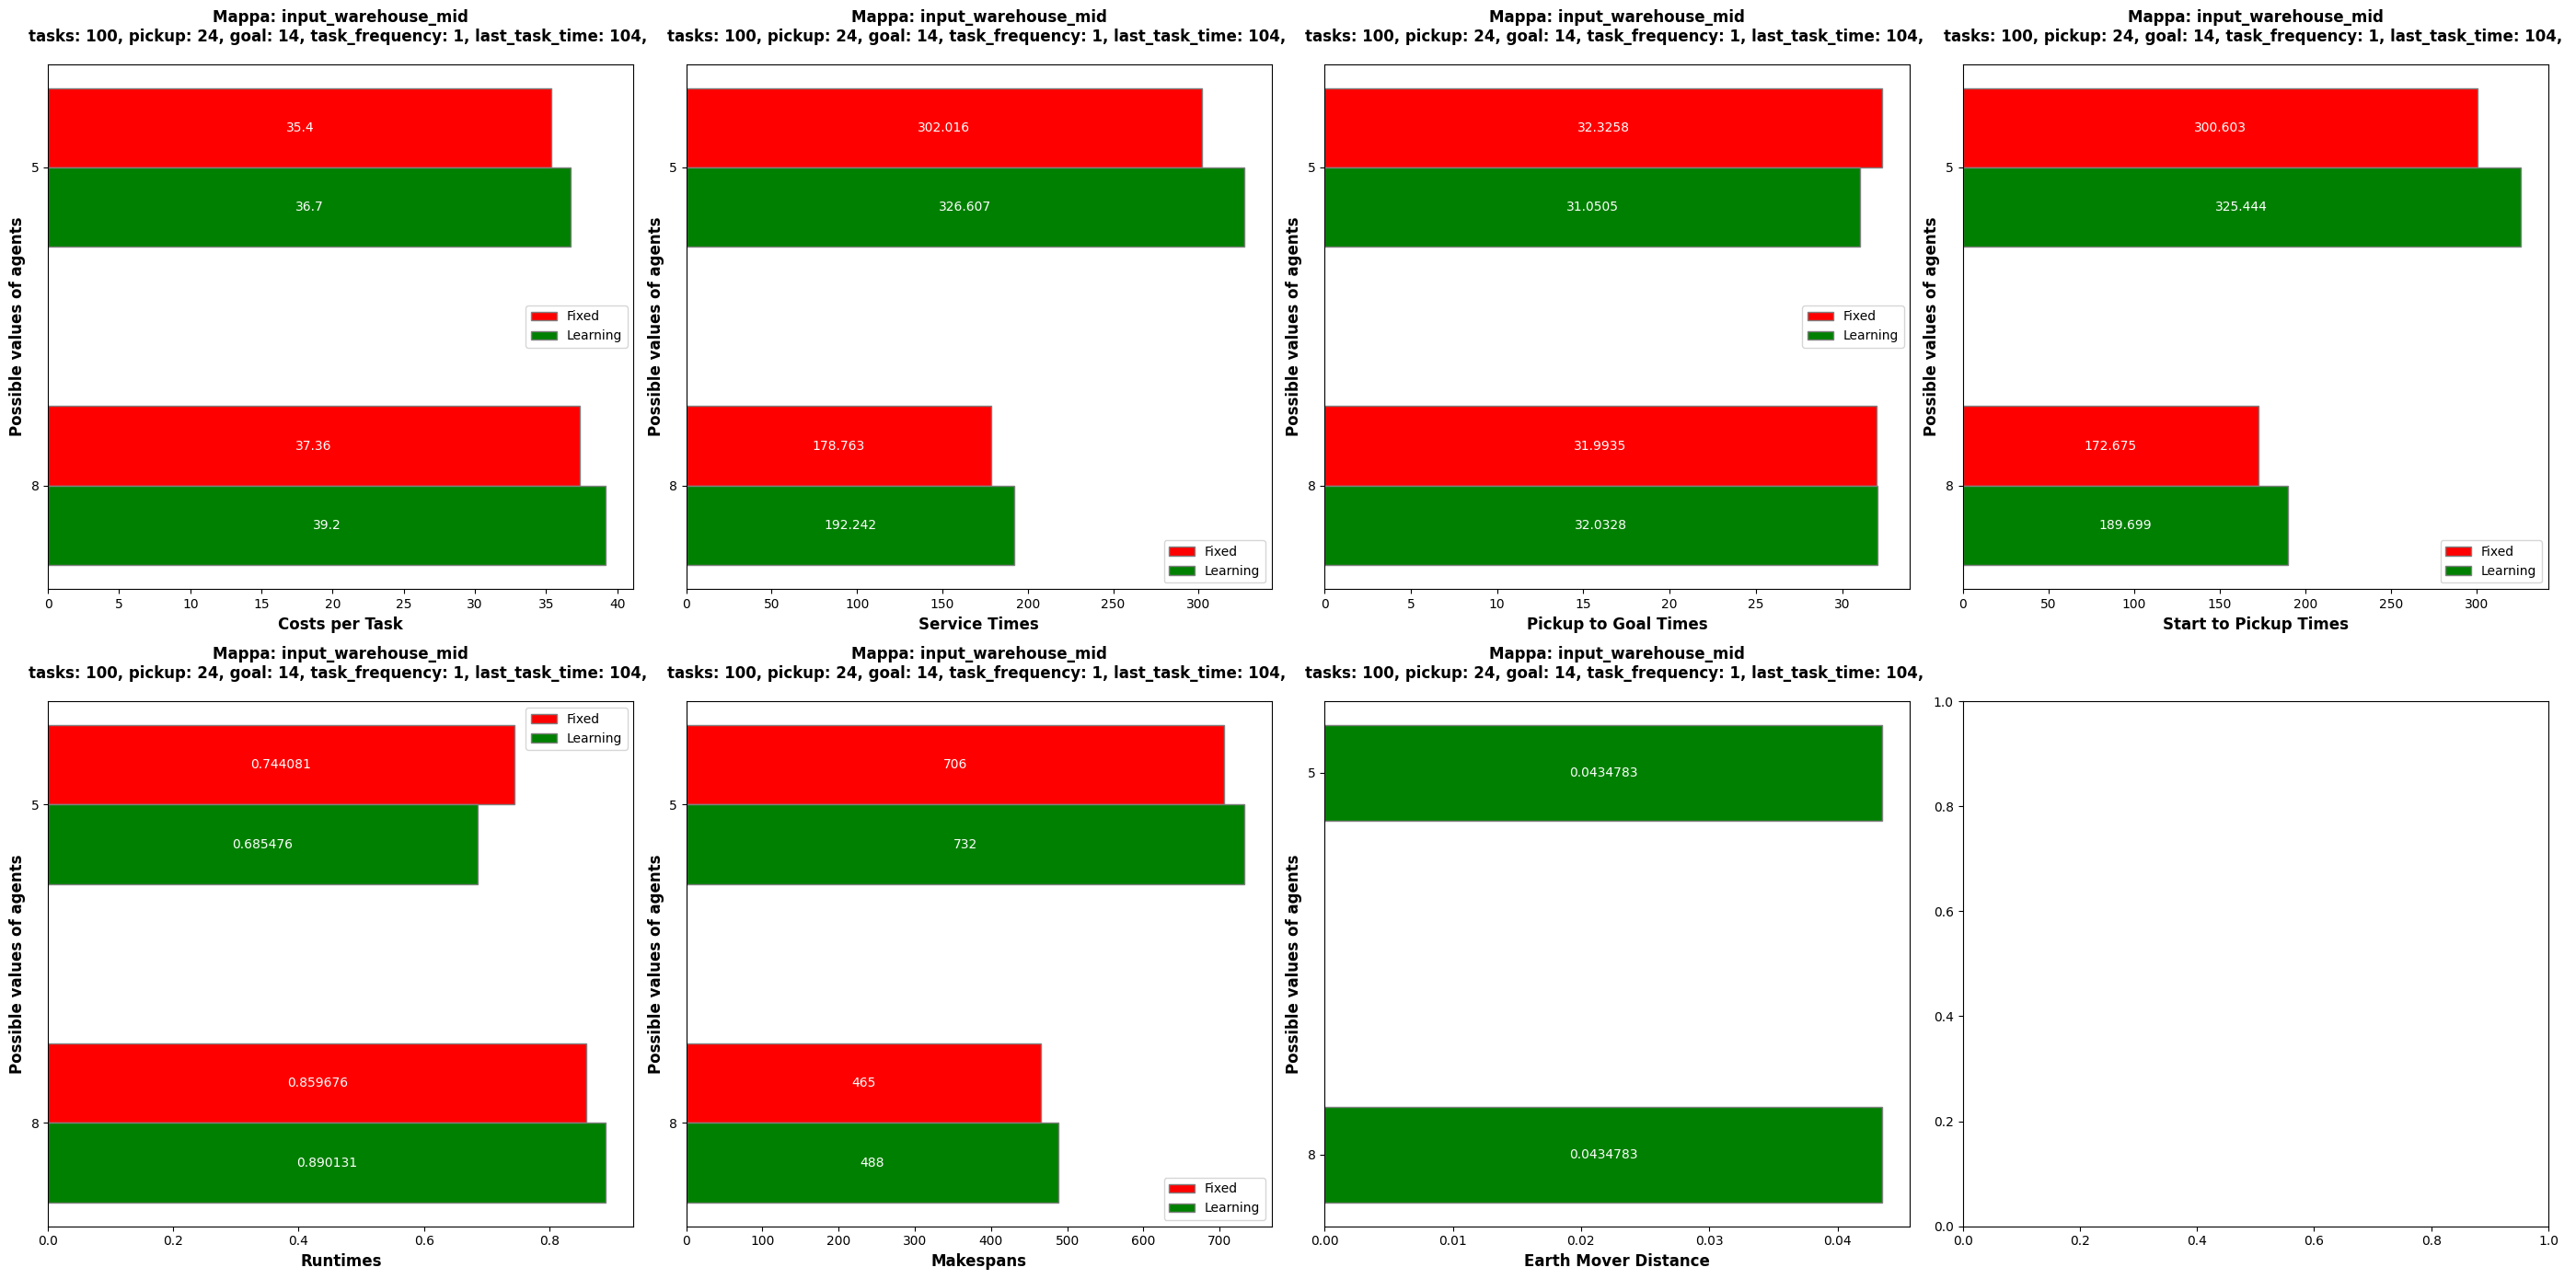

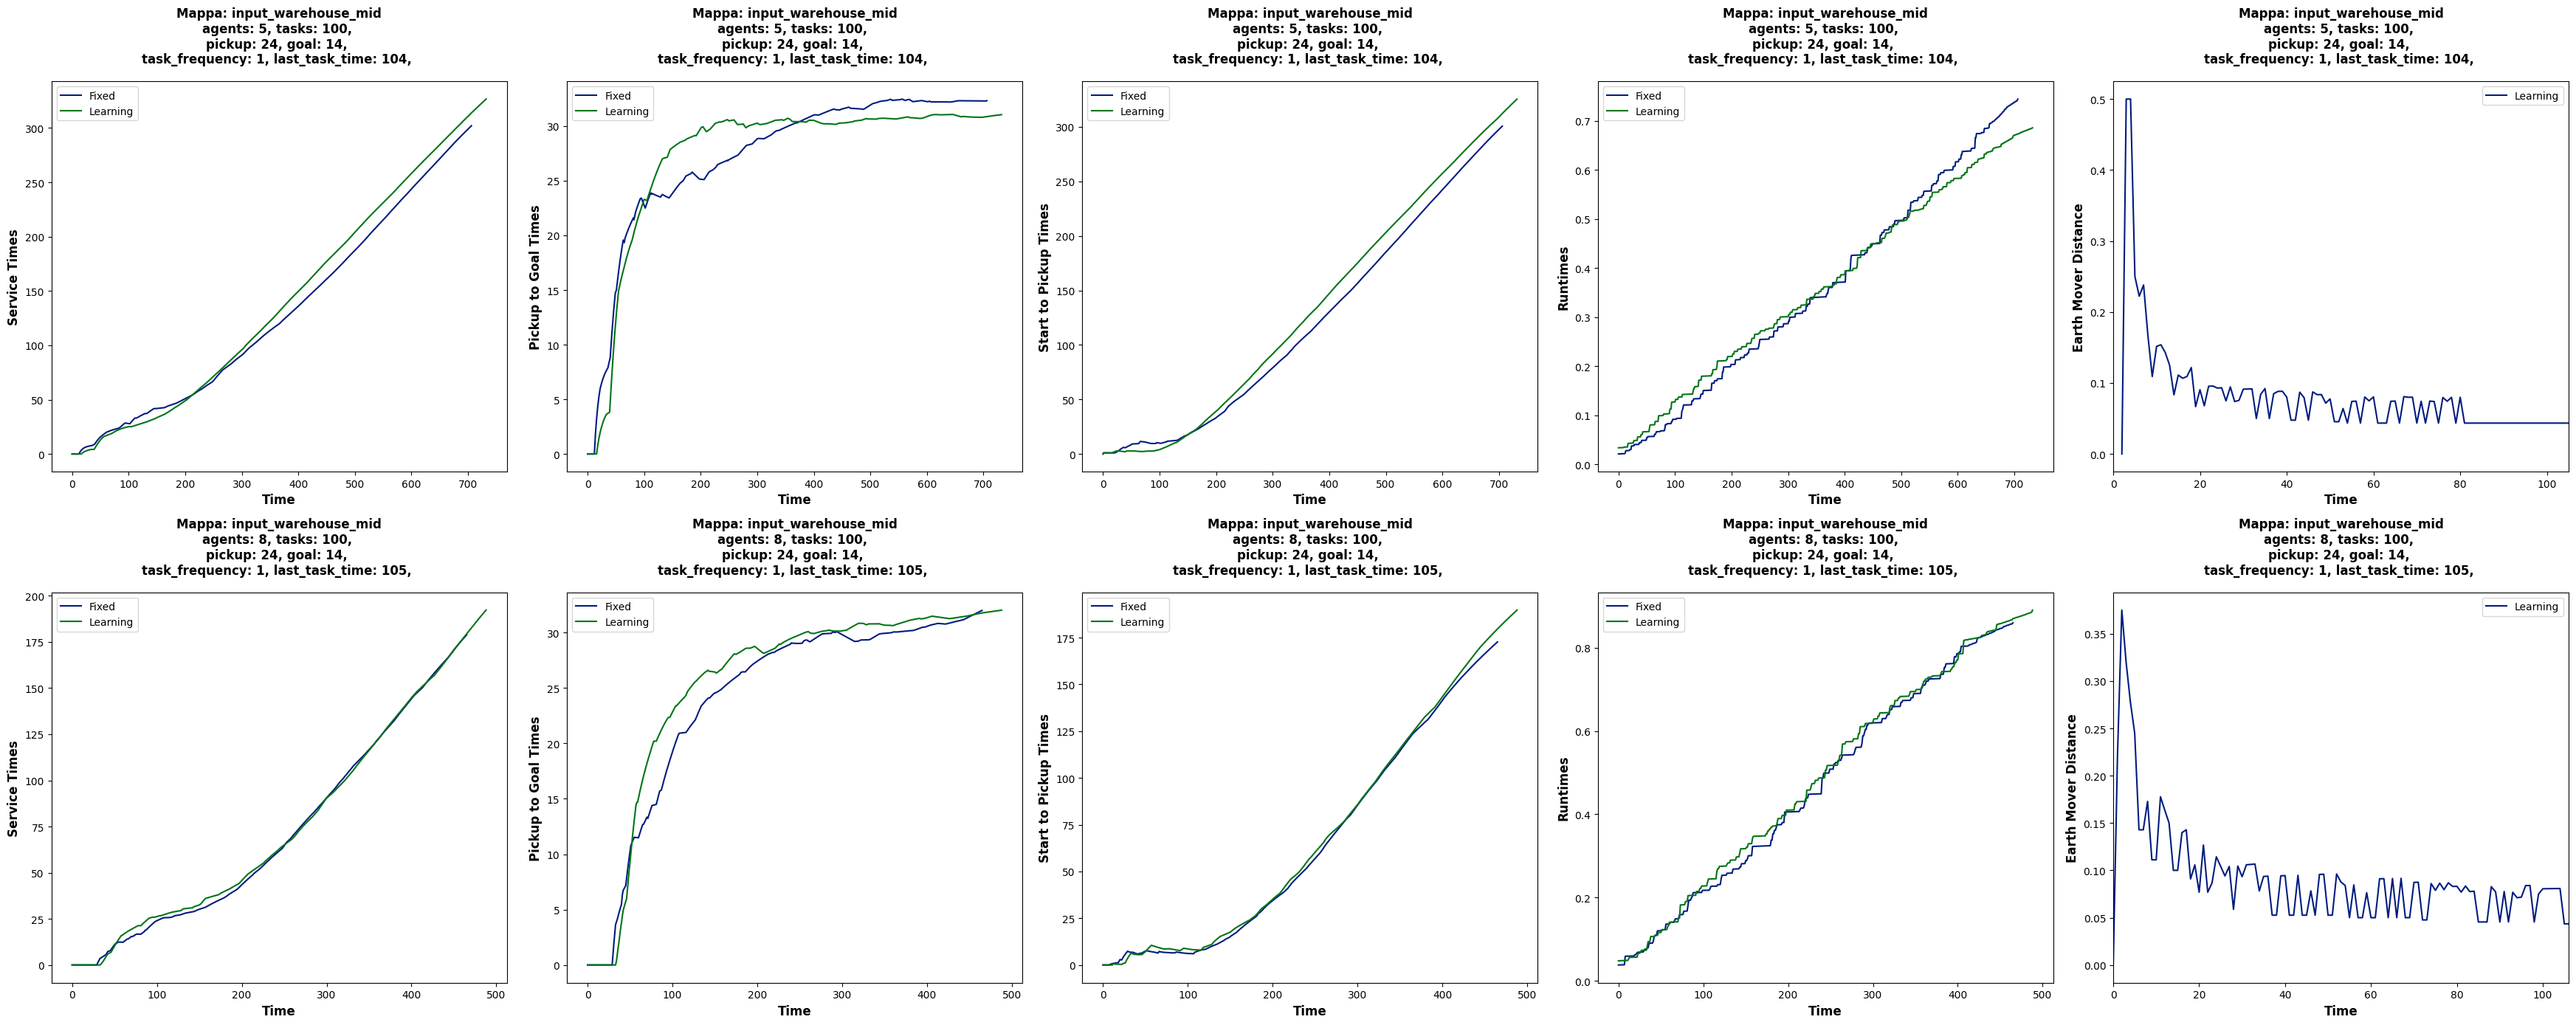

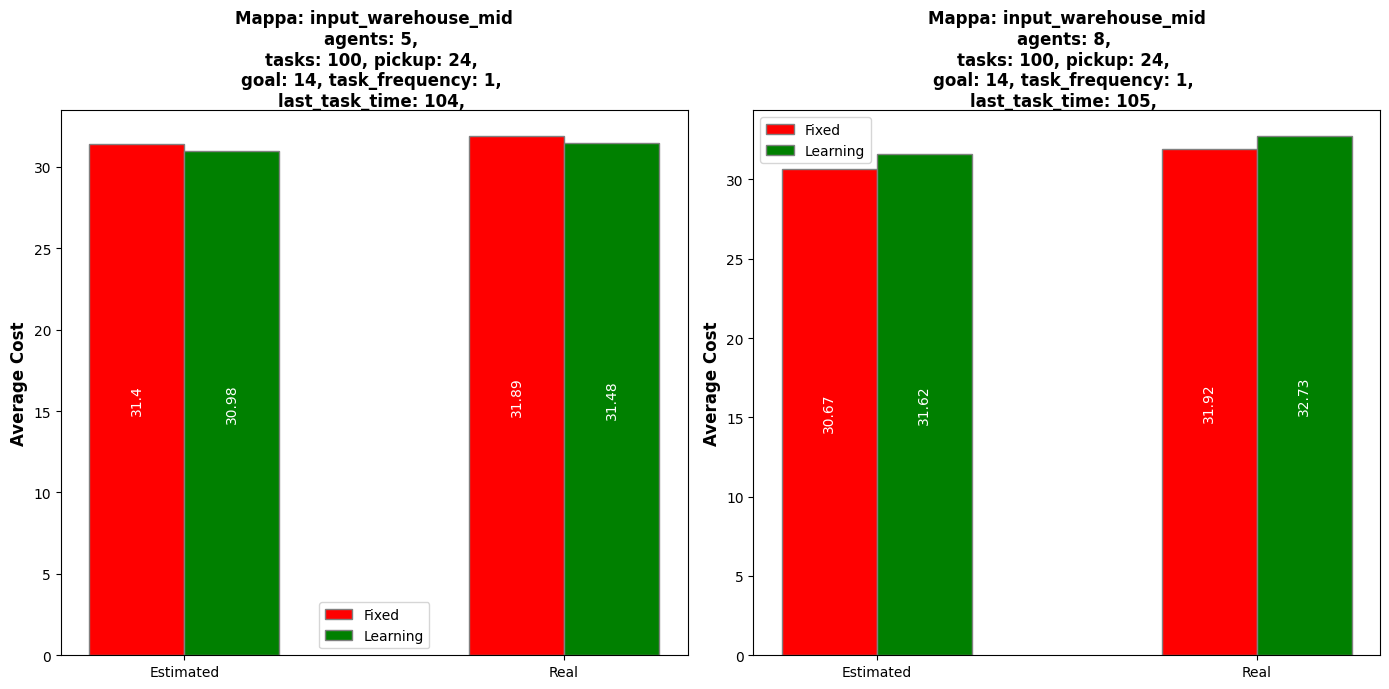

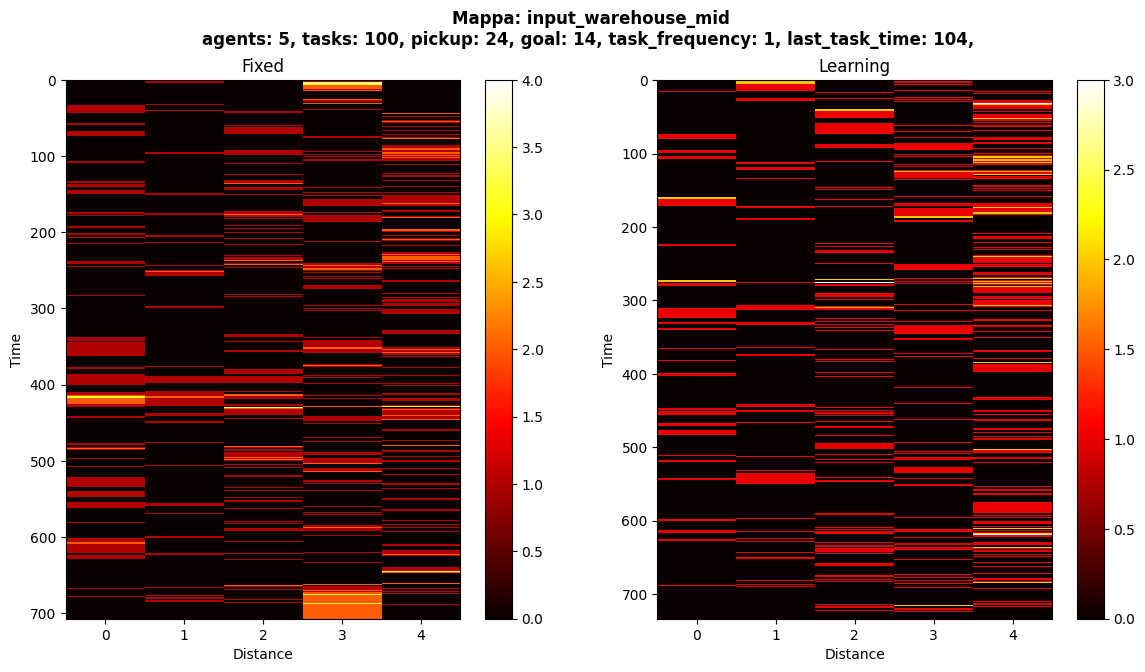

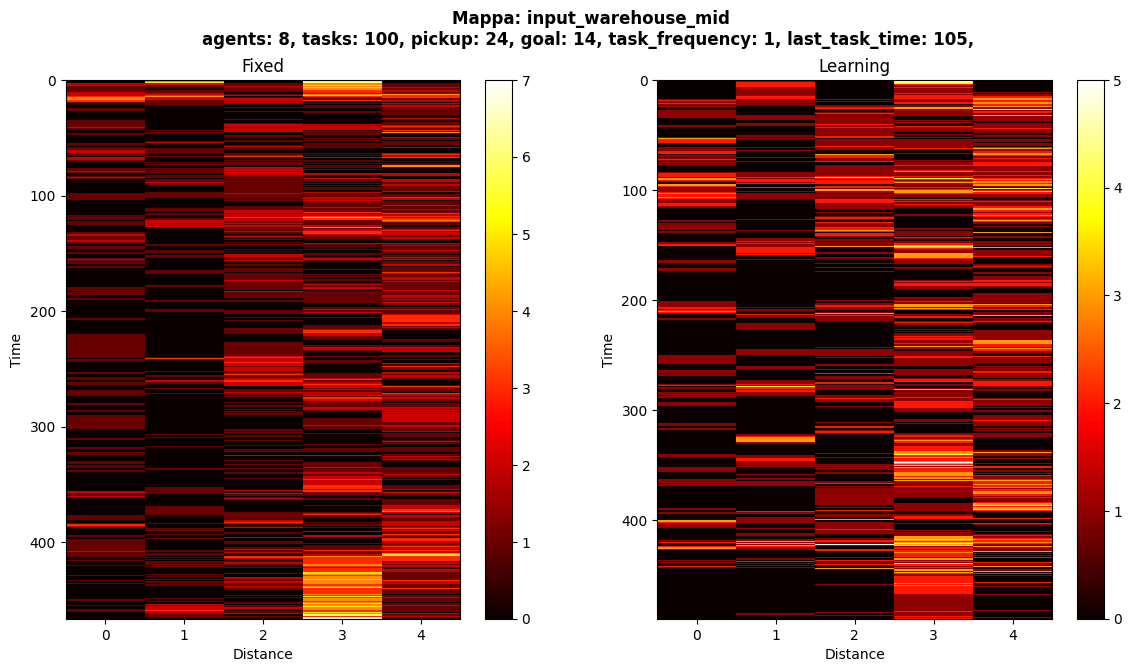

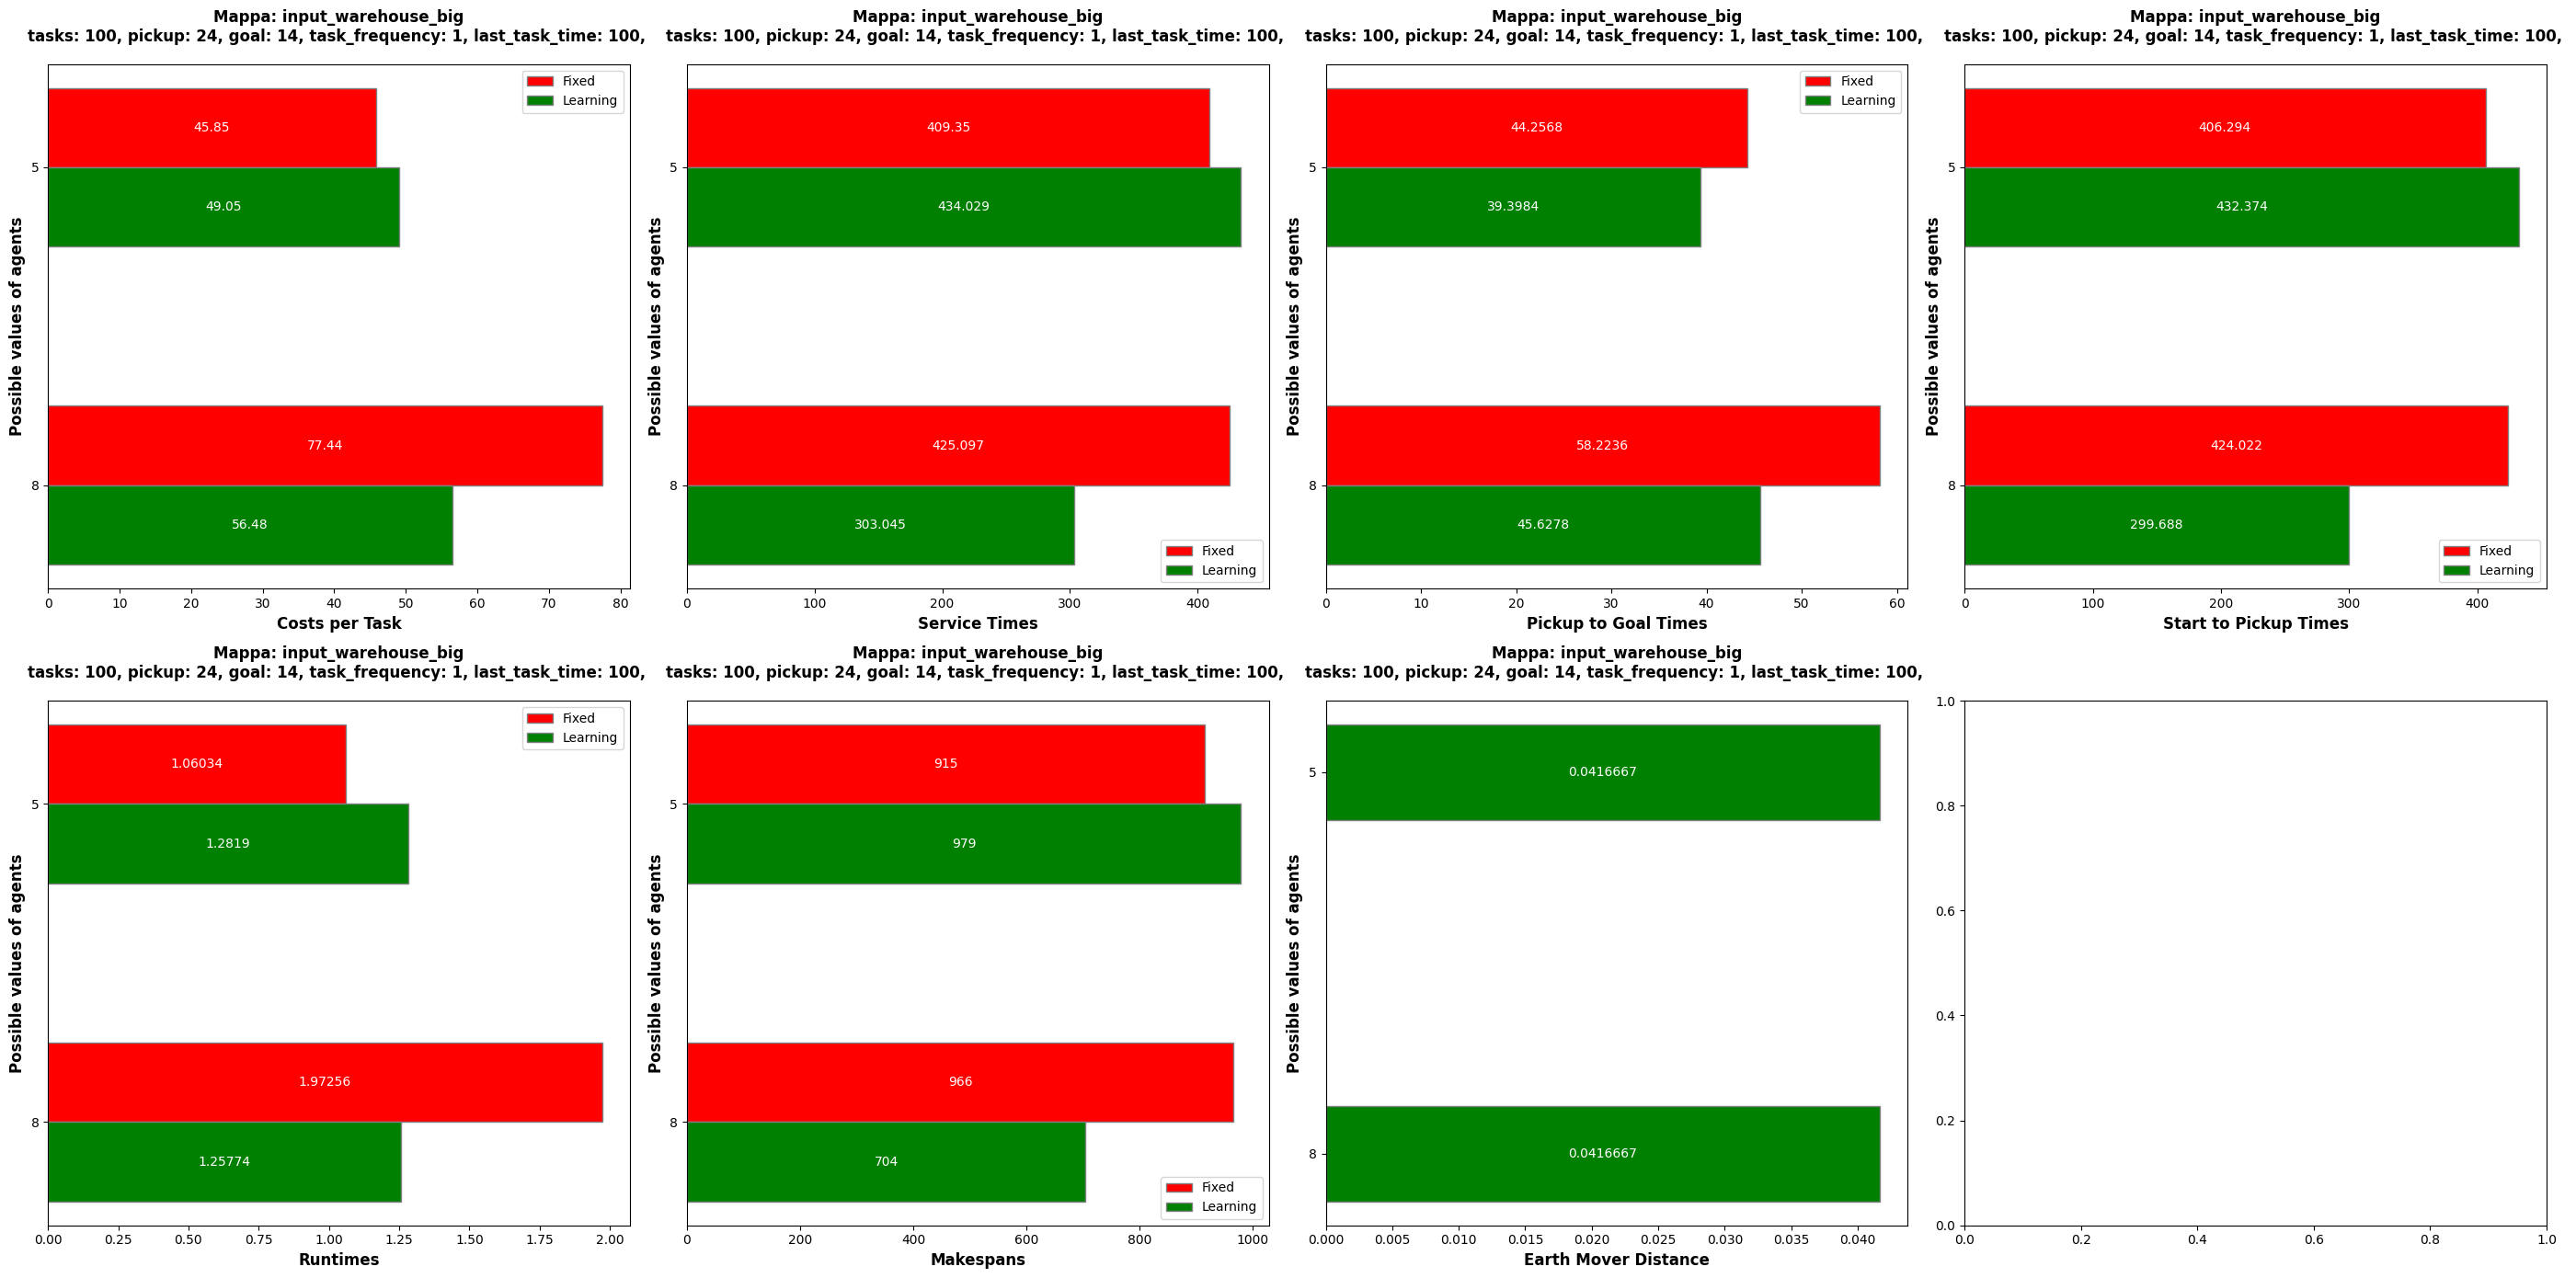

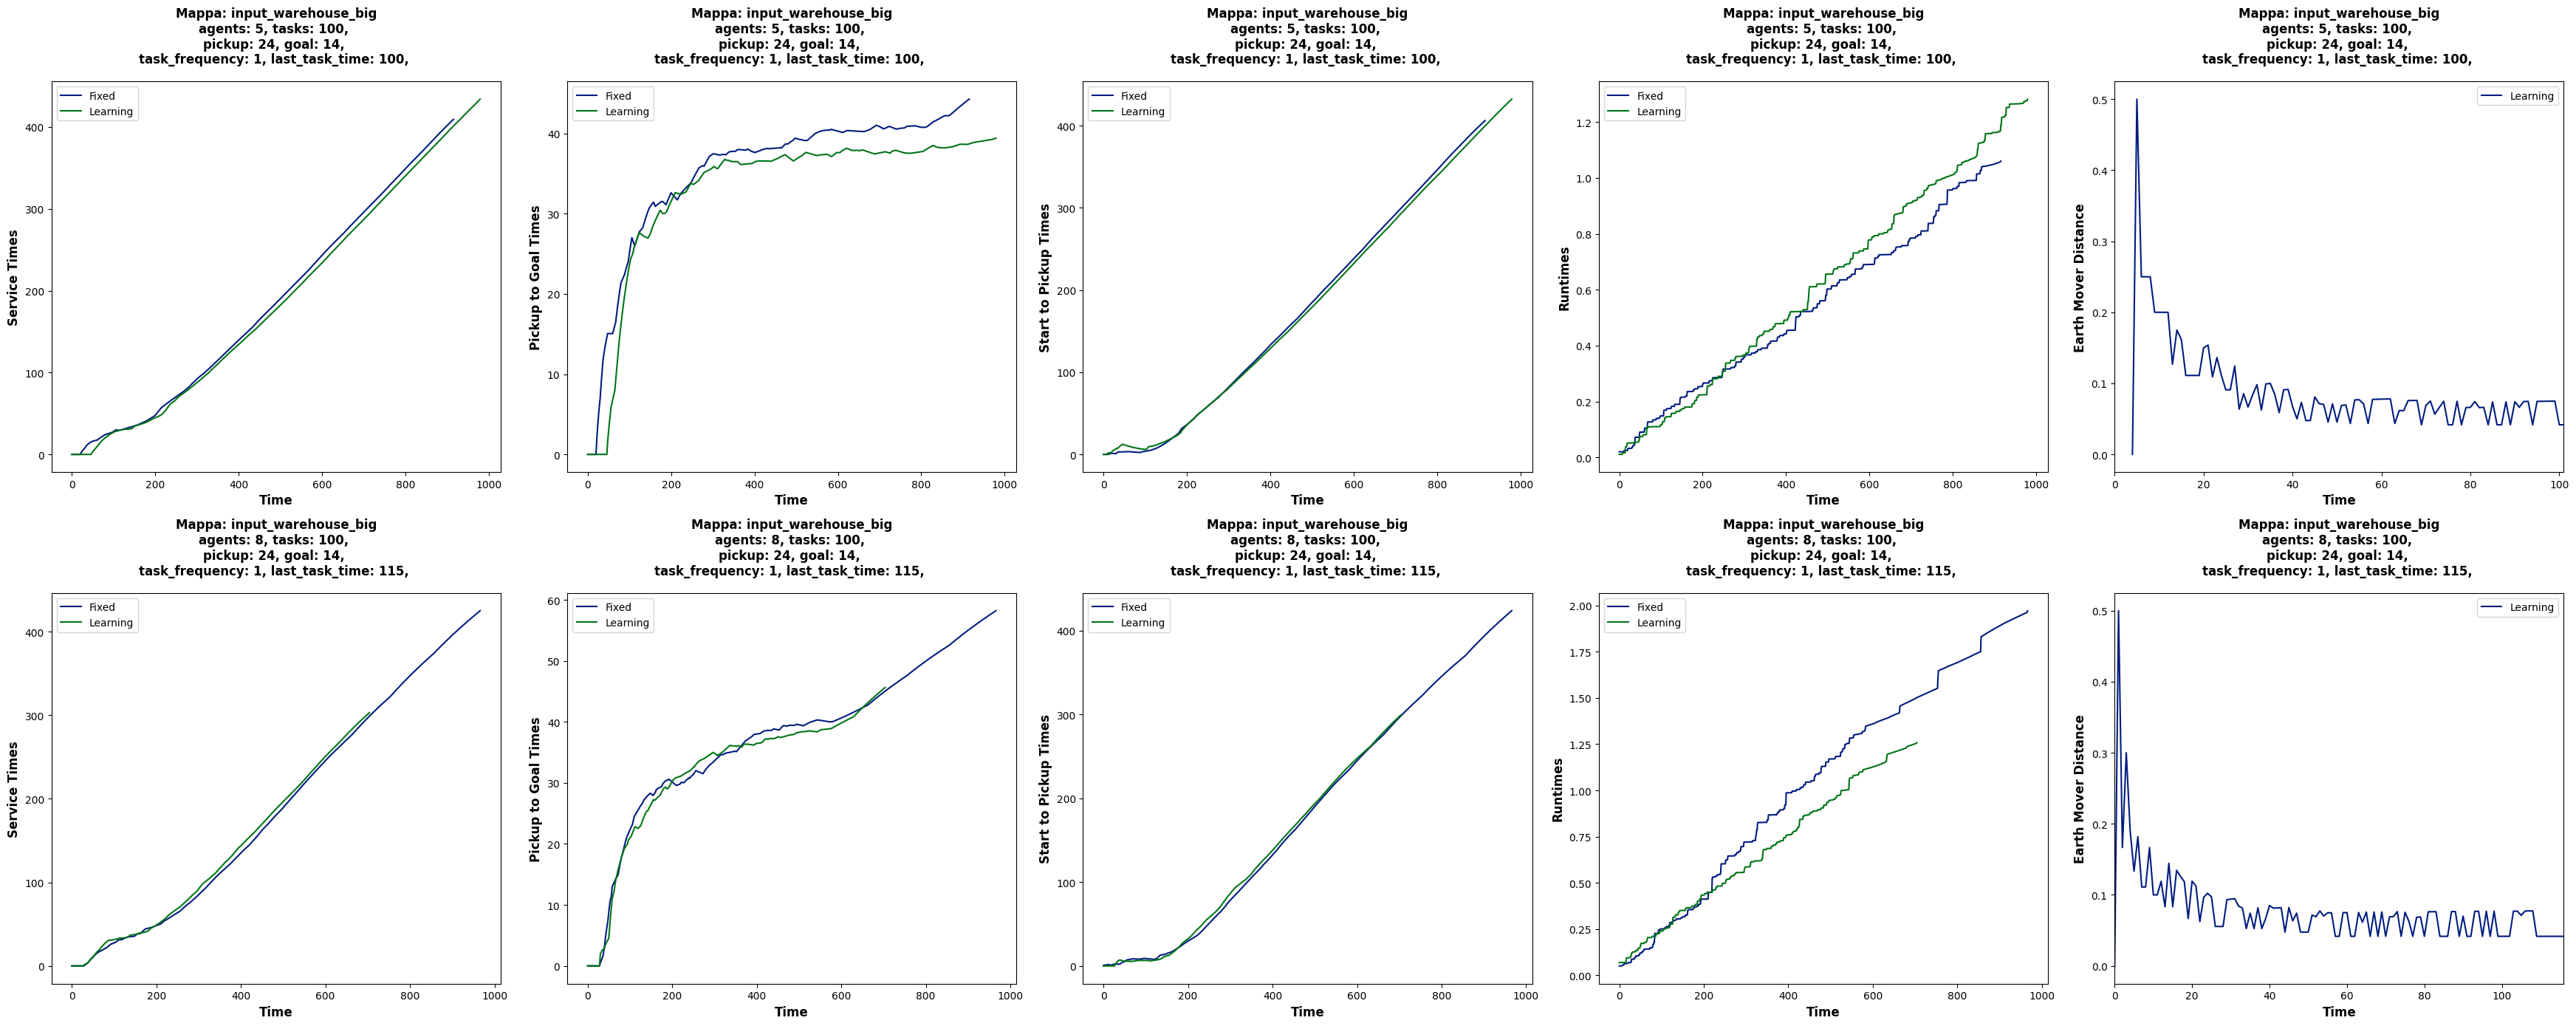

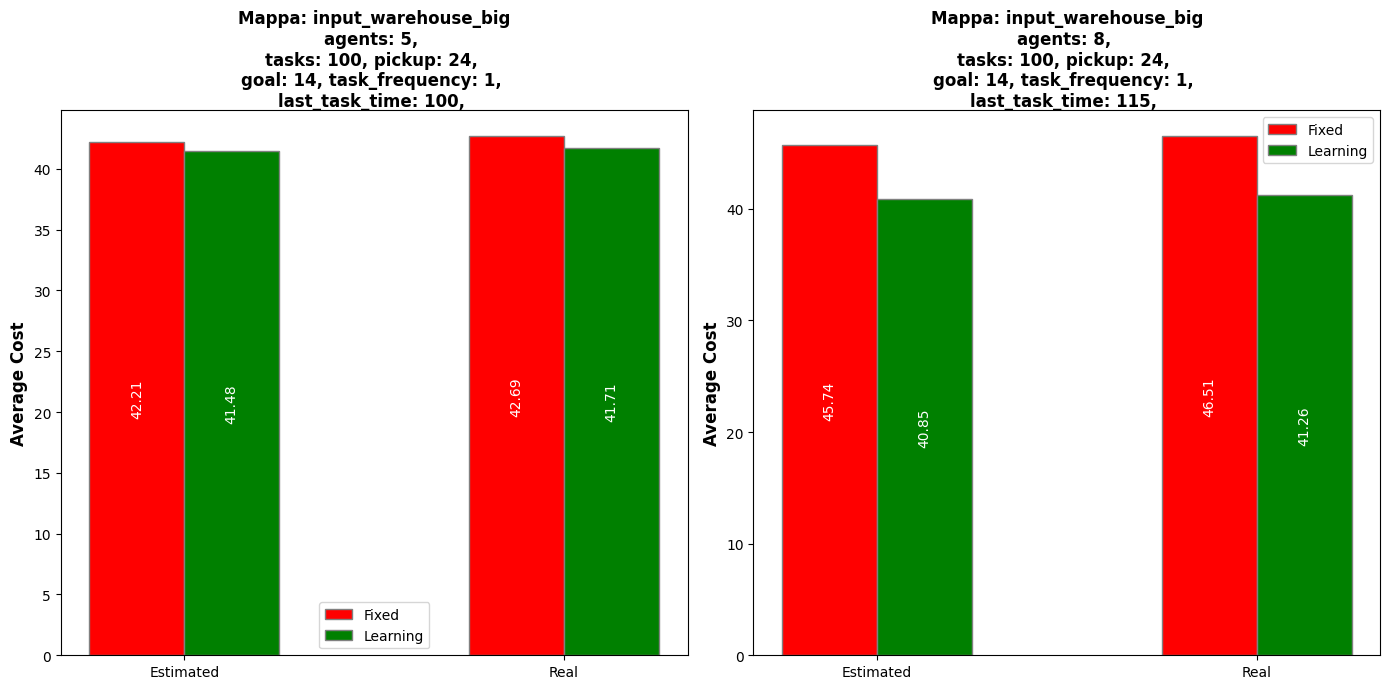

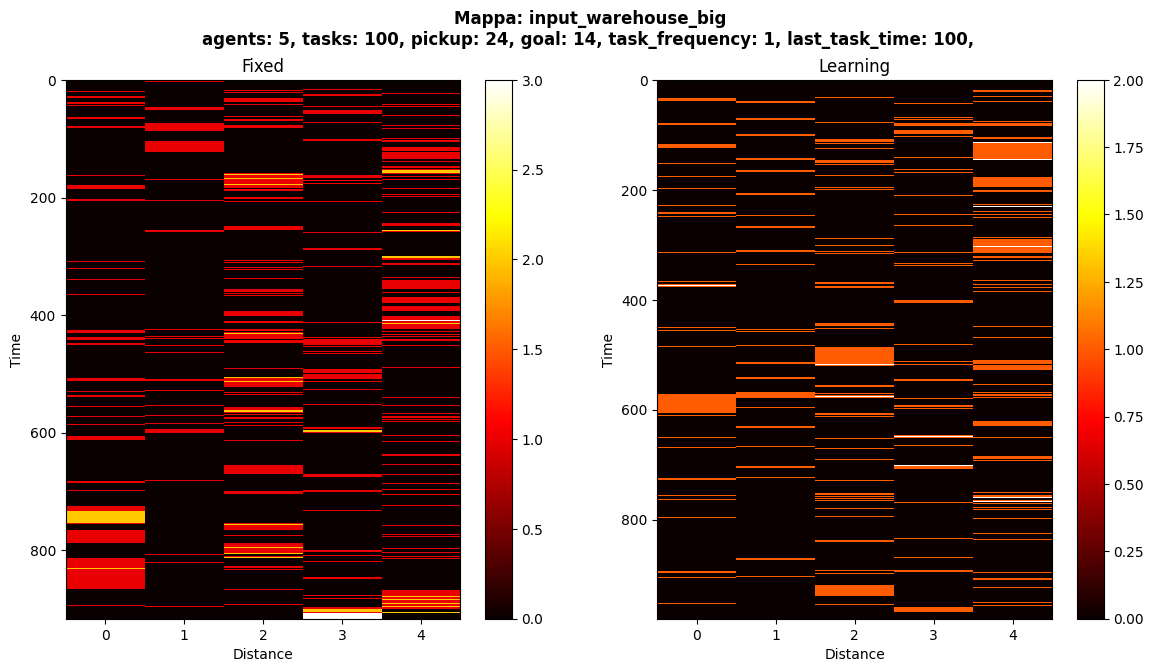

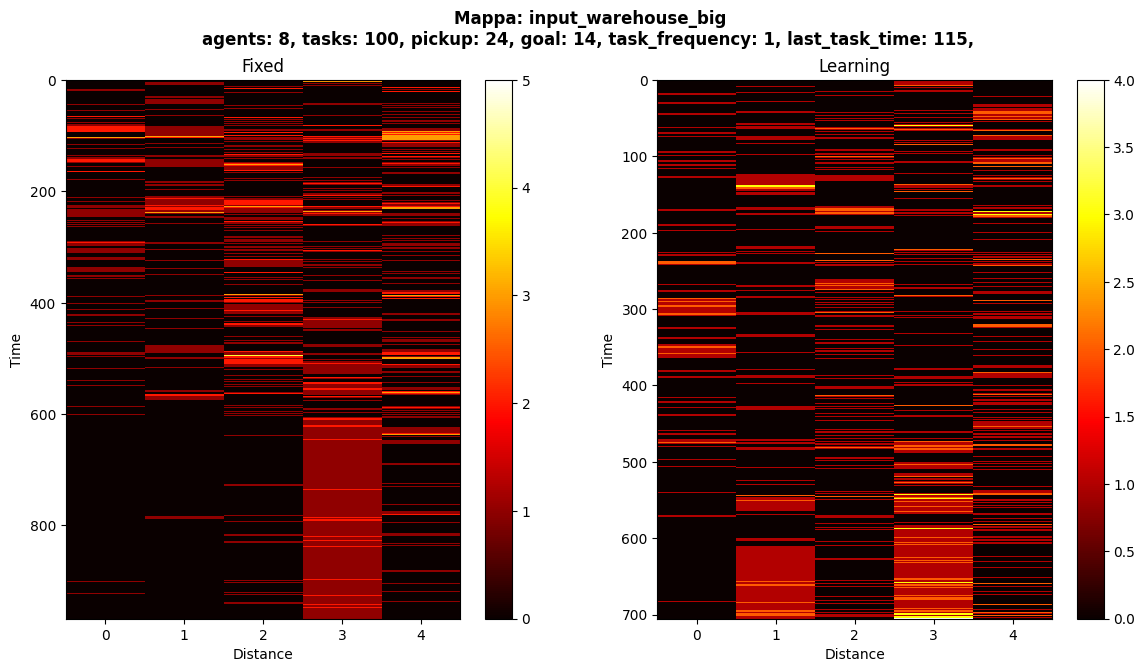

In [4]:
import matplotlib.pyplot as plt
import json
from stats_visualizer import StatsVisualizer
import os
from glob import glob
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

result_file_names = glob(os.path.join('ResultsJsons', '*.json'))

for result_file_name in result_file_names:
    with open(result_file_name, "r") as f:
        results = json.load(f)
    maps = results["maps"]
    possible_number_of_tasks = results["tasks_num"]
    possible_number_of_task_freq = results["tasks_frequency"]
    possible_number_of_agents = results["agents_num"]
    possible_number_of_starts = results["start_num"]
    possible_number_of_goals = results["goal_num"]
    
    printmd(f'# {result_file_name.split('/')[1]}\n'
            f'- ## Task number: {possible_number_of_tasks}\n'
            f'- ## Task frequency: {possible_number_of_task_freq}\n'
            f'- ## Agent number: {possible_number_of_agents}\n'
            f'- ## Pickup number: {possible_number_of_starts}\n'
            f'- ## Goal number: {possible_number_of_goals}\n'
            )
    
    stats_visualizer = StatsVisualizer(maps, possible_number_of_agents, possible_number_of_tasks, possible_number_of_task_freq, possible_number_of_starts, possible_number_of_goals)
    
    for my_map in stats_visualizer.get_map_names():
        stats_visualizer.show_all_metrics(my_map)